In [5]:
options(repr.plot.width=15, repr.plot.height=15)


In [ ]:

# Libraries
library(tidyverse)

# Create dataset
data <- data.frame(
  id = seq(1, 60),
  individual = paste("Mister ", seq(1, 60), sep = ""),
  value = sample(seq(10, 100), 60, replace = T)
)
#
options(repr.plot.width = 12, repr.plot.height = 12)

# Make the plotf
p <- ggplot(data, aes(x = as.factor(id), y = value)) + # Note that id is a factor. If x is numeric, there is some space between the first bar

  # This add the bars with a blue color
  geom_bar(stat = "identity", fill = alpha("red", 0.3)) +

  #   # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-50, 120) +

  #   # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-2, 4), "cm") # This remove unnecessary margin around plot
  ) +

  #   # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0)
p

[1] 4

NULL

individual,group,value
<lgl>,<chr>,<lgl>
NA,A,NA
NA,A,NA
NA,A,NA
NA,A,NA
NA,B,NA
NA,B,NA
NA,B,NA
NA,B,NA
NA,C,NA


individual,group,value,id
<chr>,<chr>,<int>,<int>
Mister 1,A,44,1
Mister 2,A,30,2
Mister 3,A,18,3
Mister 4,A,83,4
Mister 5,A,51,5
Mister 6,A,39,6
Mister 7,A,19,7
Mister 8,A,33,8
Mister 9,A,84,9


Warning message:
“Removed 16 rows containing missing values (position_stack).”
Warning message:
“Removed 16 rows containing missing values (geom_text).”


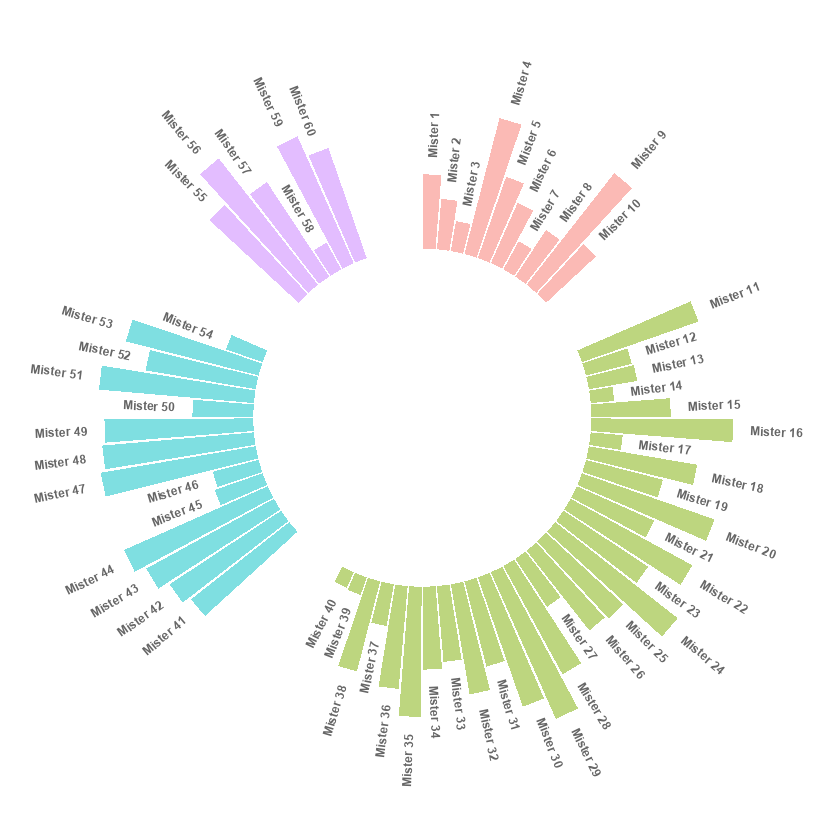

In [6]:
# library
library(tidyverse)

# Create dataset
data <- data.frame(individual = paste("Mister ", seq(1, 60), sep = ""), group = c(rep("A", 10), rep("B", 30), rep("C", 14), rep("D", 6)), value = sample(seq(10, 
  100), 60, replace = T))

# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 4
to_add <- data.frame(matrix(NA, empty_bar * length(unique(data$group)), ncol(data)))
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each = empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))

length(unique(data$group))
# data$id[data$group == 'B'] <- data$id[data$group == 'B'] + 1*empty_bar data$id[data$group == 'C'] <- data$id[data$group == 'C'] + 2*empty_bar
# data$id[data$group == 'D'] <- data$id[data$group == 'D'] + 3*empty_bar

levels(data$group)

to_add
data

# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id - 0.5)/number_of_bar
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle + 180, angle)

# Make the plot
p <- ggplot(data, aes(x = as.factor(id), y = value, fill = group)) + geom_bar(stat = "identity", alpha = 0.5) + ylim(-100, 120) + theme_minimal() + theme(legend.position = "none", 
  axis.text = element_blank(), axis.title = element_blank(), panel.grid = element_blank(), plot.margin = unit(rep(-1, 4), "cm")) + coord_polar() + geom_text(data = label_data, 
  aes(x = id, y = value + 10, label = individual, hjust = hjust), color = "black", fontface = "bold", alpha = 0.6, size = 2.5, angle = label_data$angle, 
  inherit.aes = FALSE)

p

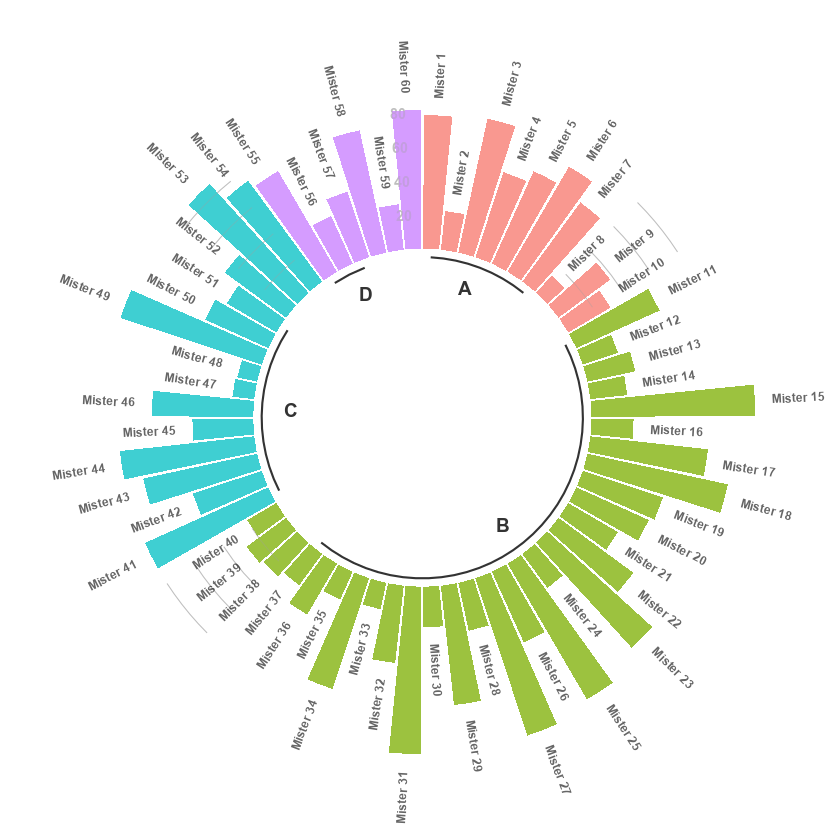

In [7]:
# library
library(tidyverse)
 
# Create dataset
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(10,100), 60, replace=T)
)
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 3
to_add <- data.frame( matrix(NA, empty_bar*nlevels(data$group), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(levels(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 
# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
  geom_segment(data=grid_data, aes(x = end, y = 80, xend = start, yend = 80), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 60, xend = start, yend = 60), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 40, xend = start, yend = 40), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 20, xend = start, yend = 20), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  
  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),4), y = c(20, 40, 60, 80), label = c("20", "40", "60", "80") , color="grey", size=3 , angle=0, fontface="bold", hjust=1) +
  
  geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Add base line information
  geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
  geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)
 
p

Warning message:
“Removed 12 rows containing missing values (position_stack).”
Warning message:
“Removed 12 rows containing missing values (position_stack).”
Warning message:
“Removed 12 rows containing missing values (geom_text).”


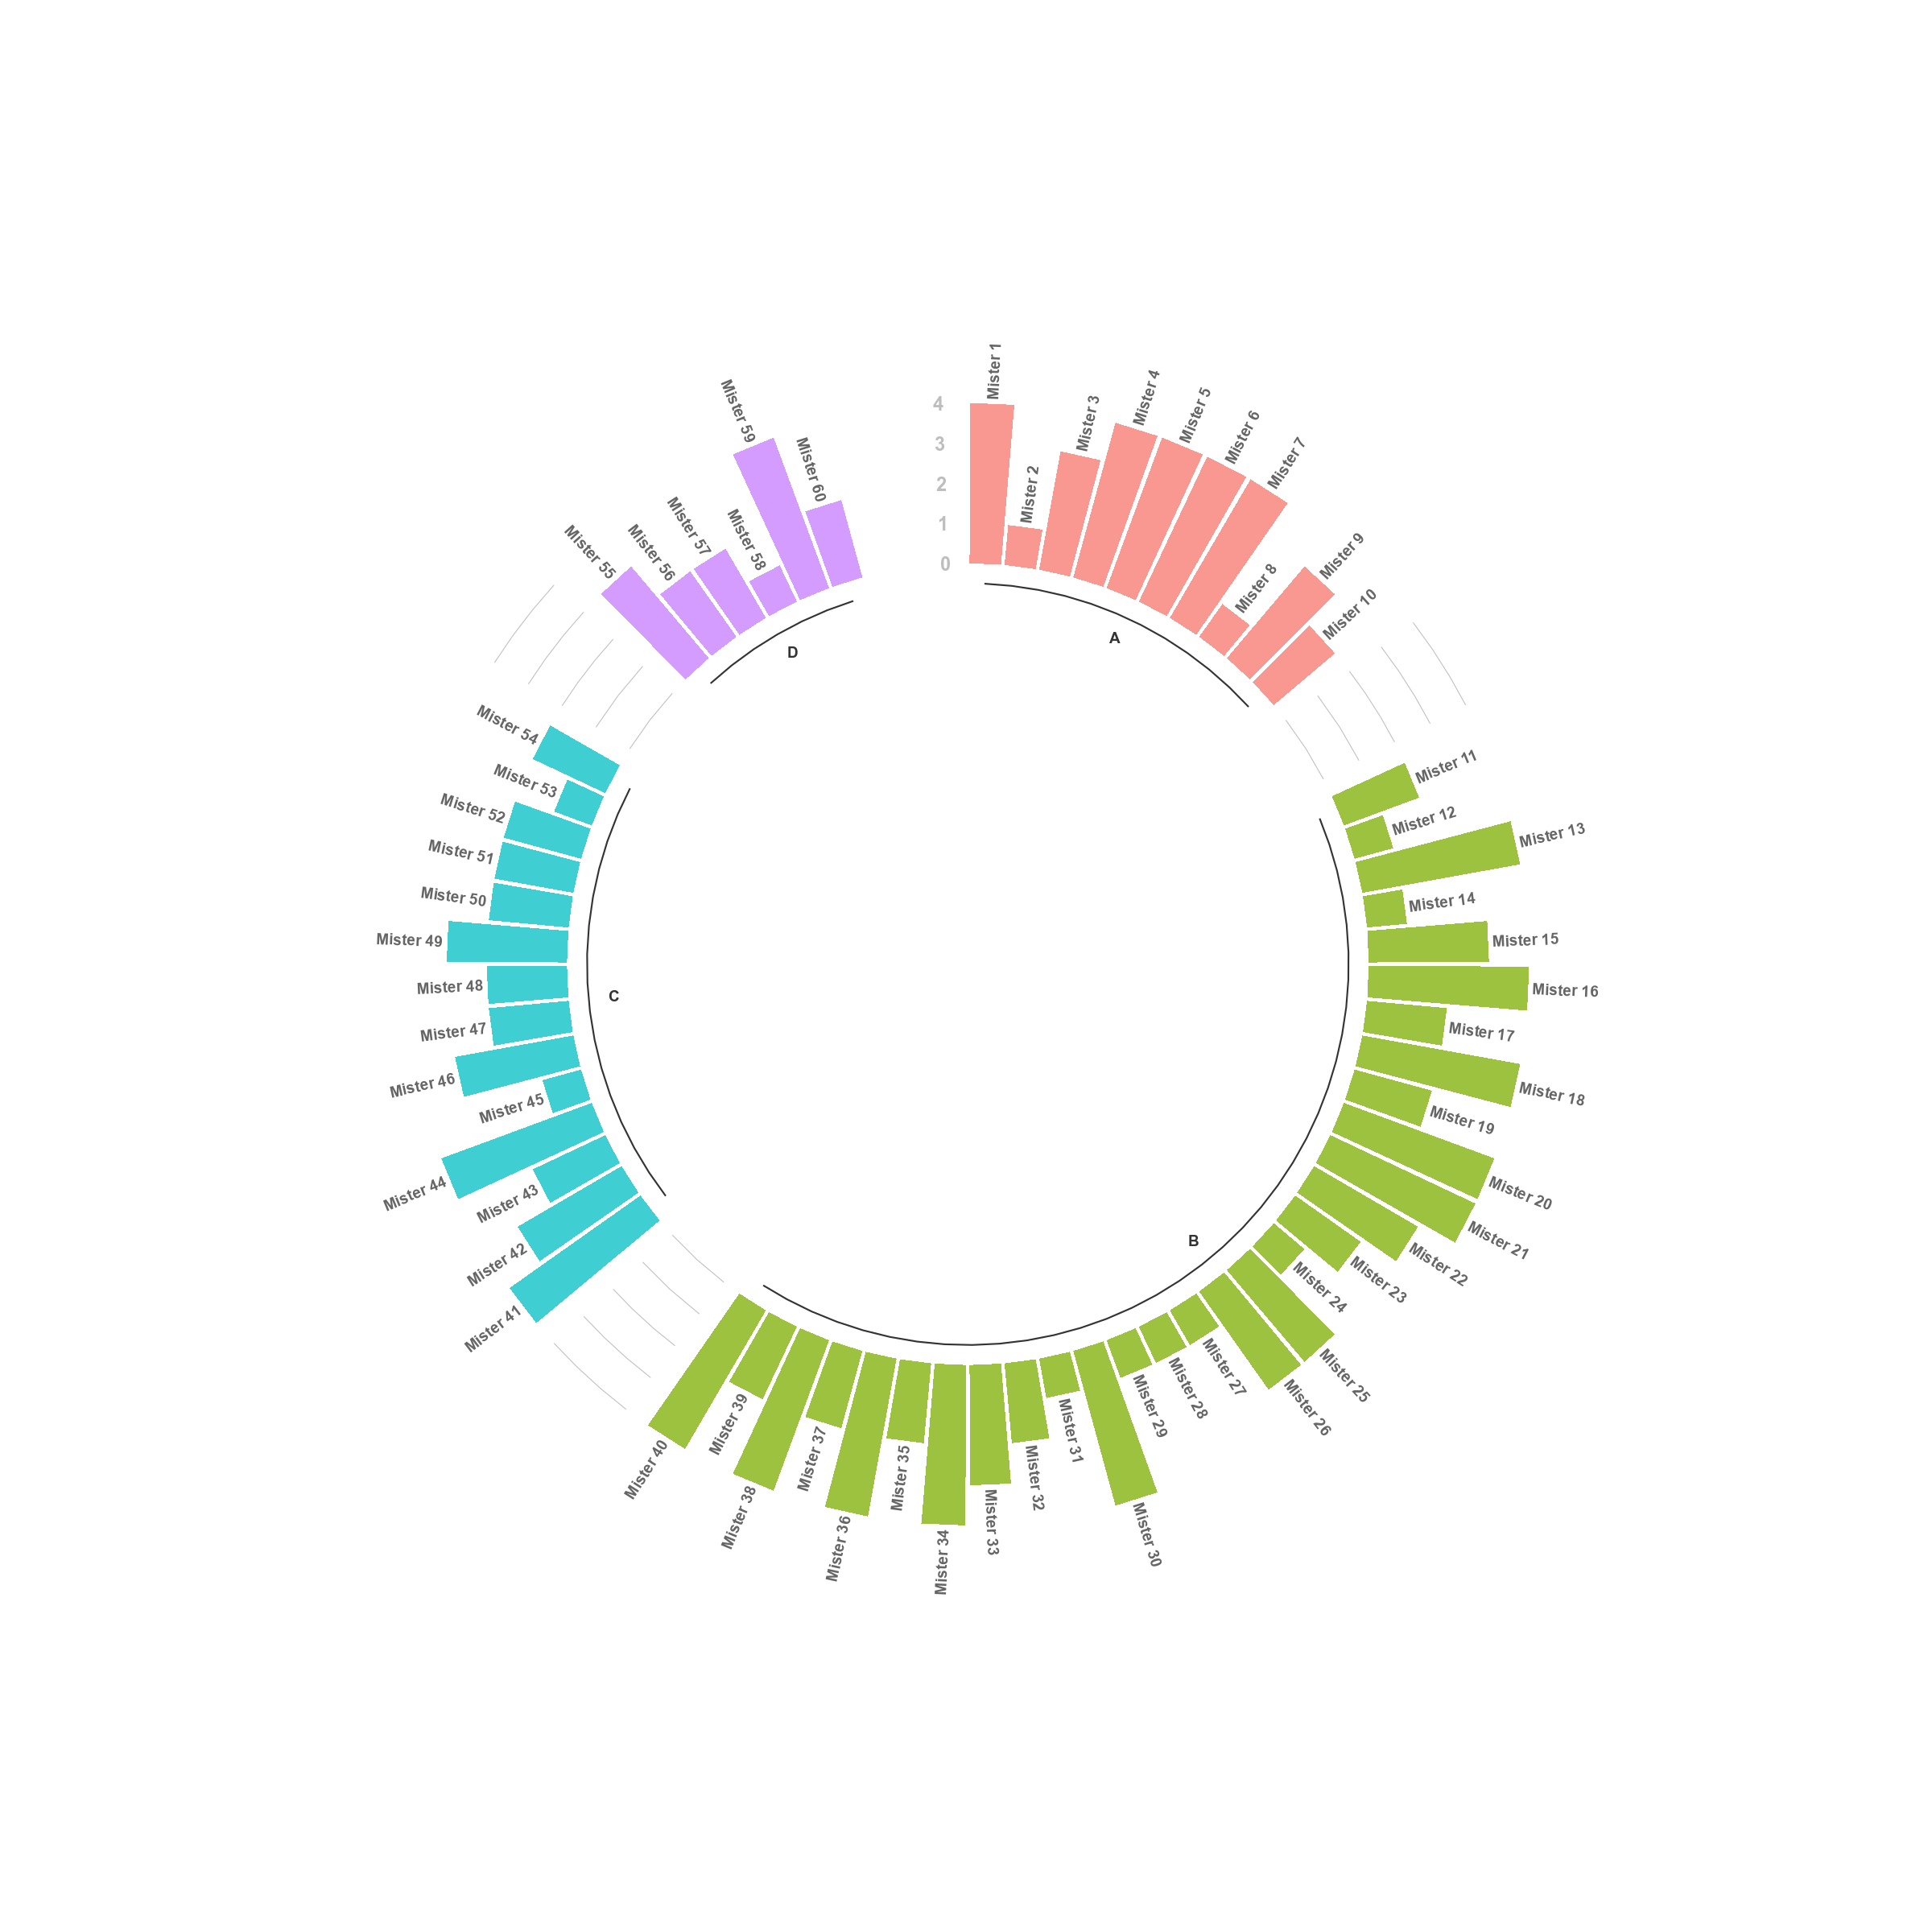

In [172]:
# library
library(tidyverse)
 
# Create dataset
data <- data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(1,4), 60, replace=T)
)
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 3
to_add <- data.frame( matrix(NA, empty_bar*length(unique(data$group)), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 
# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
  geom_segment(data=grid_data, aes(x = end, y = 4, xend = start, yend = 4), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 3, xend = start, yend = 3), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 2, xend = start, yend = 2), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 1, xend = start, yend = 1), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +

  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),5), y = c(0, 1, 2, 3, 4), label = c("0", "1", "2", "3", "4") , color="grey", size=5 , angle=0, fontface="bold", hjust=1) +
  
  geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  ylim(-10,10) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=value+0.1, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=4, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Add base line information
  geom_segment(data=base_data, aes(x = start, y = -0.5, xend = end, yend = -0.5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
  geom_text(data=base_data, aes(x = title, y =-1, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)
 
p

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.



group,start,end,title
<chr>,<dbl>,<dbl>,<dbl>
B,12,11,27.5
C,44,43,51.5
D,60,59,63.5


id,individual,tot,hjust,angle
<int>,<chr>,<int>,<dbl>,<dbl>
1,Mister 1,93,0,87.352941
2,Mister 10,148,0,82.058824
3,Mister 2,210,0,76.764706
4,Mister 3,194,0,71.470588
5,Mister 4,209,0,66.176471
6,Mister 5,277,0,60.882353
7,Mister 6,182,0,55.588235
8,Mister 7,221,0,50.294118
9,Mister 8,113,0,45.000000


individual,group,observation,value,id
<chr>,<chr>,<chr>,<int>,<int>
Mister 1,A,value1,57,1
Mister 1,A,value2,24,1
Mister 1,A,value3,12,1
Mister 10,A,value1,11,2
Mister 10,A,value2,62,2
Mister 10,A,value3,75,2
Mister 2,A,value1,48,3
Mister 2,A,value2,91,3
Mister 2,A,value3,71,3


Warning message:
“Removed 24 rows containing missing values (position_stack).”
Warning message:
“Removed 9 rows containing missing values (geom_text).”


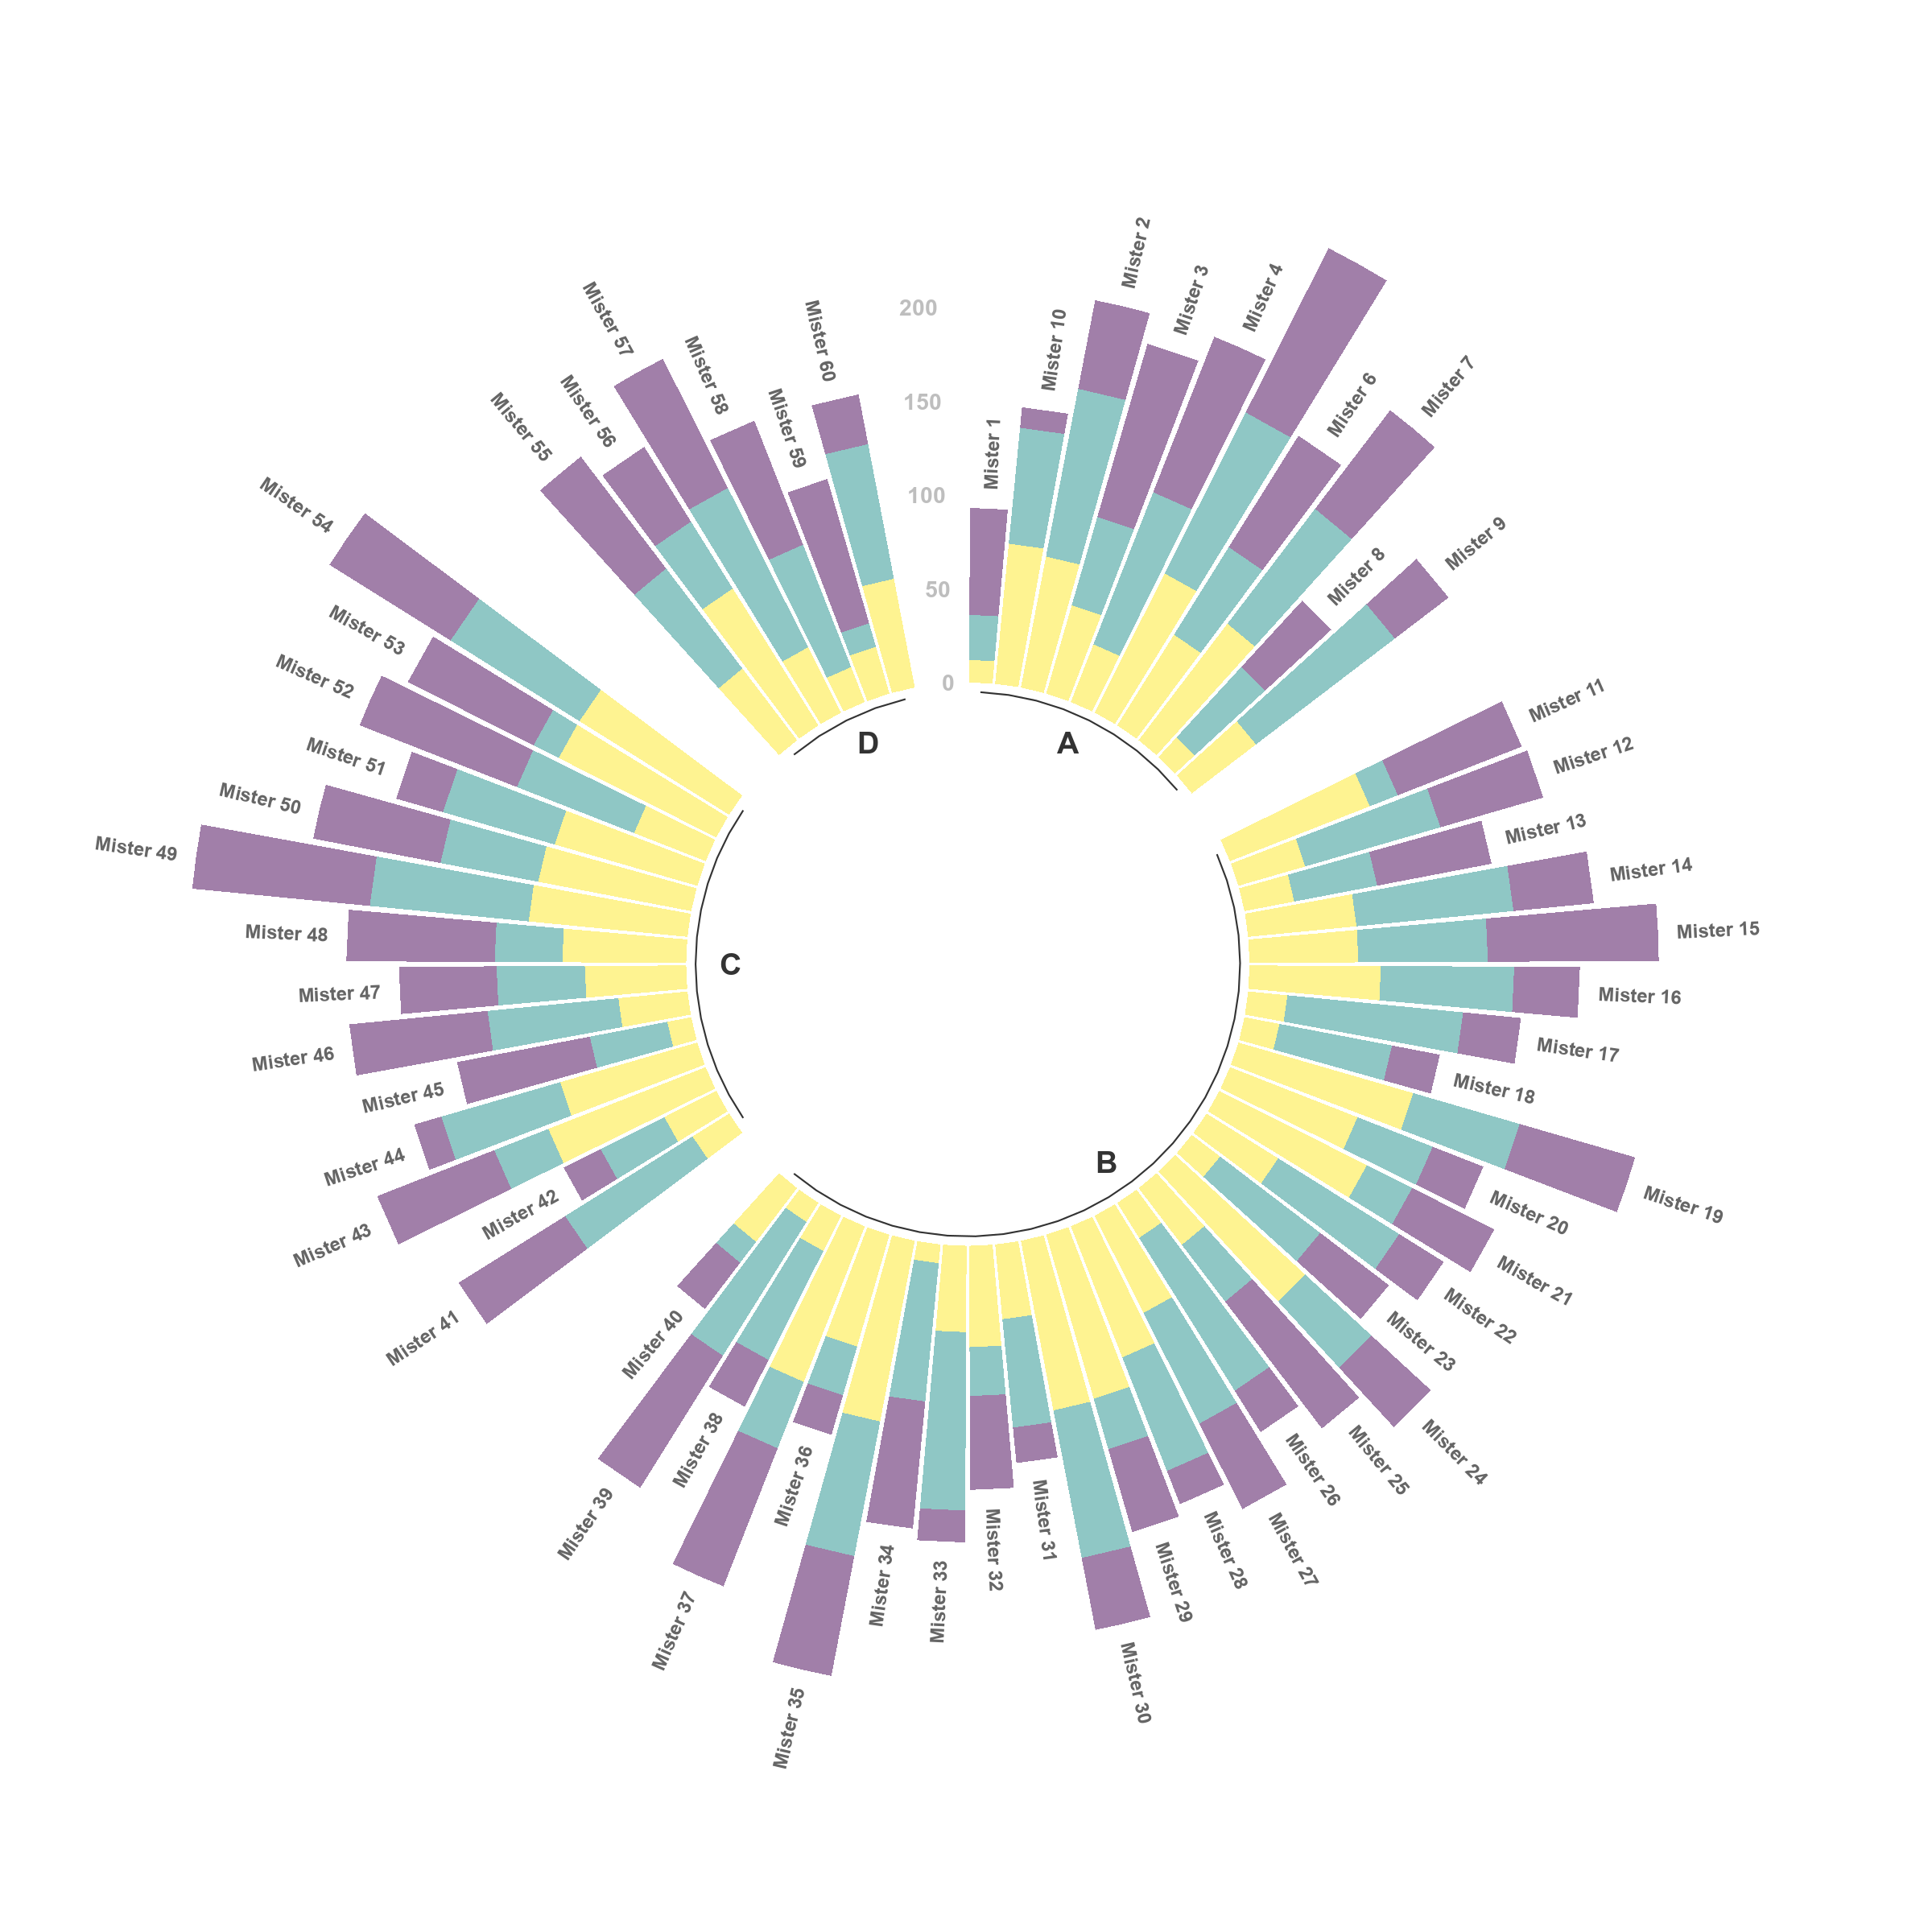

In [103]:
library(ggplot2)

options(repr.plot.width = 20, repr.plot.height = 20)


# Create dataset
data <- data.frame(individual = paste("Mister ", seq(1, 60), sep = ""), group = c(rep("A", 10), rep("B", 30), rep("C", 14), rep("D", 6)), value1 = sample(seq(10, 
  100), 60, replace = T), value2 = sample(seq(10, 100), 60, replace = T), value3 = sample(seq(10, 100), 60, replace = T))

# Transform data in a tidy format (long format)
data <- data %>% gather(key = "observation", value = "value", -c(1, 2))

# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 2
nObsType <- length(unique(as.factor(data$observation)))


to_add <- data.frame(matrix(NA, empty_bar * length(unique(data$group)) * nObsType, ncol(data)))
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each = empty_bar * nObsType)
data <- rbind(data, to_add)
data <- data %>% arrange(group, individual)
data$id <- rep(seq(1, nrow(data)/nObsType), each = nObsType)

# Get the name and the y position of each label
label_data <- data %>% group_by(id, individual) %>% summarize(tot = sum(value))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id - 0.5)/number_of_bar  # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle + 180, angle)

# prepare a data frame for base lines
base_data <- data %>% group_by(group) %>% summarize(start = min(id), end = max(id) - empty_bar) %>% rowwise() %>% mutate(title = mean(c(start, end)))

# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[c(nrow(grid_data), 1:nrow(grid_data) - 1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1, ]

# Make the plot
p <- ggplot(data, ) + 
# Add the stacked bar
geom_bar(aes(x = as.factor(id), y = value, fill = observation), stat = "identity", alpha = 0.5) + 
viridis::scale_fill_viridis(discrete = TRUE) + 
# # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.  geom_segment(data=grid_data, aes(x = end, y = 0, xend =
# start, yend = 0), colour = 'grey', alpha=1, size=0.3 , inherit.aes = FALSE ) + geom_segment(data=grid_data, aes(x = end, y = 50, xend = start, yend =
# 50), colour = 'grey', alpha=1, size=0.3 , inherit.aes = FALSE ) + geom_segment(data=grid_data, aes(x = end, y = 100, xend = start, yend = 100),
# colour = 'grey', alpha=1, size=0.3 , inherit.aes = FALSE ) + geom_segment(data=grid_data, aes(x = end, y = 150, xend = start, yend = 150), colour =
# 'grey', alpha=1, size=0.3 , inherit.aes = FALSE ) + geom_segment(data=grid_data, aes(x = end, y = 200, xend = start, yend = 200), colour = 'grey',
# alpha=1, size=0.3 , inherit.aes = FALSE ) +

# Add text showing the value of each 100/75/50/25 lines
annotate("text", x = rep(max(data$id), 5), y = c(0, 50, 100, 150, 200), label = c("0", "50", "100", "150", "200"), color = "grey", size = 6, angle = 0, 
  fontface = "bold", hjust = 1) + 
ylim(-150, max(label_data$tot, na.rm = T)) + theme_minimal() + theme(legend.position = "none", axis.text = element_blank(), axis.title = element_blank(), 
  panel.grid = element_blank(), plot.margin = unit(rep(-1, 4), "cm"), text = element_text(size = 20), ) + 
  coord_polar() + 
# Add labels on top of each bar
geom_text(data = label_data, aes(x = id, y = tot + 10, label = individual, hjust = hjust), color = "black", fontface = "bold", alpha = 0.6, size = 5, angle = label_data$angle, 
  inherit.aes = FALSE) + 
# Add base line information
geom_segment(data = base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha = 0.8, size = 0.6, inherit.aes = FALSE) + geom_text(data = base_data, 
  aes(x = title, y = -18, label = group), hjust = c(1, 1, 0, 0), colour = "black", alpha = 0.8, size = 8, fontface = "bold", inherit.aes = FALSE)
grid_data
label_data
data
p

In [44]:
library(ggplot2)

options(repr.plot.width = 20, repr.plot.height = 20)


# Create dataset
data=data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value1=sample( seq(10,100), 60, replace=T),
  value2=sample( seq(10,100), 60, replace=T),
  value3=sample( seq(10,100), 60, replace=T)
)
 
# Transform data in a tidy format (long format)
data = data %>% gather(key = "observation", value="value", -c(1,2)) 
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar=2
nObsType=length(unique(as.factor(data$observation)))

to_add = data.frame( matrix(NA, empty_bar*1*nObsType, ncol(data)) )
colnames(to_add) = colnames(data)
to_add$group=rep(unique(data$group), each=empty_bar*nObsType )
rep(unique(data$group)

# data=rbind(data, to_add)
# data=data %>% arrange(group, individual)
# data$id=rep( seq(1, nrow(data)/nObsType) , each=nObsType)
 
# # Get the name and the y position of each label
# label_data= data %>% group_by(id, individual) %>% summarize(tot=sum(value))
# number_of_bar=nrow(label_data)
# angle= 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
# label_data$hjust<-ifelse( angle < -90, 1, 0)
# label_data$angle<-ifelse(angle < -90, angle+180, angle)
 
# # prepare a data frame for base lines
# base_data=data %>% 
#   group_by(group) %>% 
#   summarize(start=min(id), end=max(id) - empty_bar) %>% 
#   rowwise() %>% 
#   mutate(title=mean(c(start, end)))
 
# # prepare a data frame for grid (scales)
# grid_data = base_data
# grid_data$end = grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
# grid_data$start = grid_data$start - 1
# grid_data=grid_data[-1,]
 
# # Make the plot
# p = ggplot(data, ) +      
  
#   # Add the stacked bar
#   geom_bar(aes(x=as.factor(id), y=value, fill=observation), stat="identity", alpha=0.5) +

#   viridis::scale_fill_viridis(discrete=TRUE) +
  
#   # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
#   geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 50, xend = start, yend = 50), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 100, xend = start, yend = 100), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 150, xend = start, yend = 150), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 200, xend = start, yend = 200), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  
#   # Add text showing the value of each 100/75/50/25 lines
#   annotate("text", x = rep(max(data$id),5), y = c(0, 50, 100, 150, 200), label = c("0", "50", "100", "150", "200") , color="grey", size=2 , angle=0, fontface="bold", hjust=1) +
  
#   ylim(-150,max(label_data$tot, na.rm=T)) +
#   theme_minimal() +
#   theme(
#     legend.position = "none",
#     axis.text = element_blank(),
#     axis.title = element_blank(),
#     panel.grid = element_blank(),
#     plot.margin = unit(rep(-1,4), "cm"),
#     text = element_text(size=20),
      
#   ) +
#   coord_polar() +
  
#   # Add labels on top of each bar
#   geom_text(data=label_data, aes(x=id, y=tot+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  
#   # Add base line information
#   geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
#   geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=8, fontface="bold", inherit.aes = FALSE)
# p

ERROR: Error in parse(text = x, srcfile = src): <text>:87:0: unexpected end of input
85: #   geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=8, fontface="bold", inherit.aes = FALSE)
86: # p
   ^


In [30]:
data

individual,group,observation,value,id
<chr>,<chr>,<chr>,<int>,<int>
Mister 1,A,value1,57,1
Mister 1,A,value2,24,1
Mister 1,A,value3,31,1
Mister 10,A,value1,34,2
Mister 10,A,value2,16,2
Mister 10,A,value3,78,2
Mister 2,A,value1,40,3
Mister 2,A,value2,71,3
Mister 2,A,value3,22,3


In [ ]:
# Loading
library("readxl")
library("tidyverse")
library("ggplot2")
library("dplyr")

# xlsx files
data <- read_excel("/gstock/EXOTIC/data/EXOTIC/circular_barplot_total.xlsx")

In [630]:
library("scales")
library("ggsci")

scale_color_npg.palette

ERROR: Error in eval(expr, envir, enclos): objet 'scale_color_npg.palette' introuvable


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] 52

group,start,end,title
<chr>,<int>,<dbl>,<dbl>
A,1,52,26.5


Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”


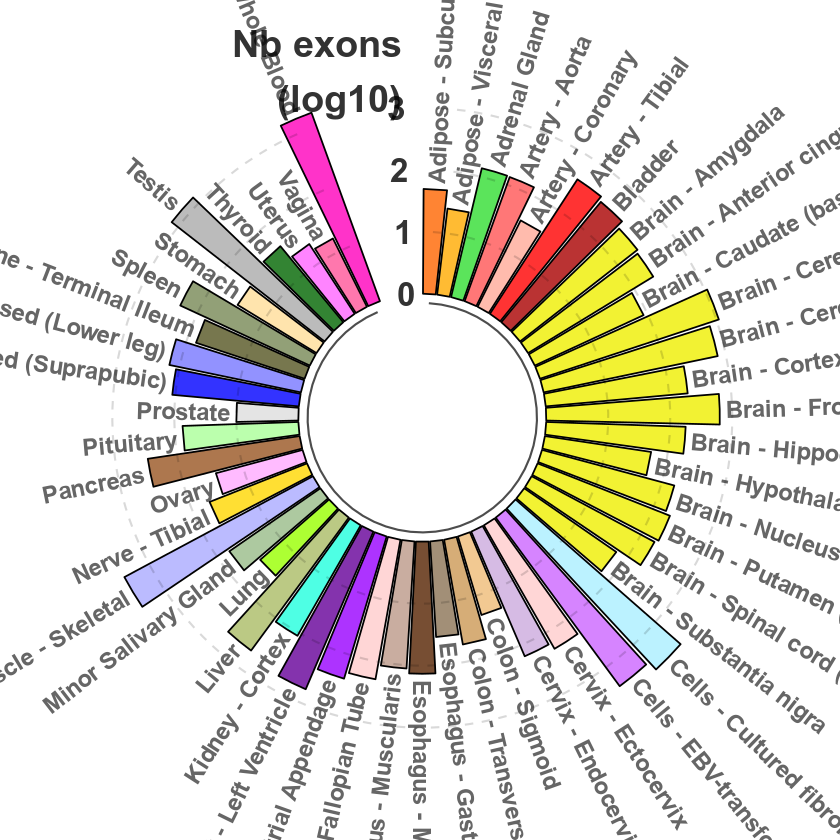

In [1]:
# Loading
library("readxl")
library("tidyverse")
library("ggplot2")
library("dplyr")

# xlsx files
data <- read_excel("/gstock/EXOTIC/data/EXOTIC/circular_barplot_total.xlsx")
length(unique(data$Tissue))
# colors
 
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 3
to_add <- data.frame( matrix(NA, empty_bar*length(unique(data$group)), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 
# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=log_value)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  geom_bar(aes(x=as.factor(id), y=log_value, fill=Tissue), stat="identity",  colour='black', alpha=0.8)  + scale_fill_manual(values=data$Color) + 
   
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
#   geom_segment(data=grid_data, aes(x = end, y = 4, xend = start, yend = 4), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 3, xend = start, yend = 3), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 2, xend = start, yend = 2), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 1, xend = start, yend = 1), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +

  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),4), y = c(0, 1, 2, 3), label = c("0", "1", "2", "3") , color="black", alpha=0.8, size=7 , angle=0, fontface="bold", hjust=1)  +
  annotate("text", x = rep(max(data$id),1), y = c(3.6), label = c("Nb exons\n(log10)") , color="black", alpha=0.8, size=8 , angle=0, fontface="bold", hjust=1)  +
  
  ylim(-2,4) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") ,
    text = element_text(size=20)
  ) +
  coord_polar() +
  geom_text(data=label_data, aes(x=id, y=log_value+0.1, label=Tissue, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  
#   # Add base line information
    geom_segment(data=base_data, aes(x = start, y = 0 - 0.15, xend = end, yend = 0-0.15), colour = "black", alpha=0.7, size=0.6 , inherit.aes = FALSE)  +
    geom_segment(data=base_data, aes(x = start, y = 1, xend = end, yend = 1), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  +
    geom_segment(data=base_data, aes(x = start, y = 2, xend = end, yend = 2), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE  , linetype=2) + 
geom_segment(data=base_data, aes(x = start, y = 3, xend = end, yend = 3), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  
#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)
base_data
p

In [2]:
# Loading
library("readxl")
library("tidyverse")
library("ggplot2")
library("dplyr")
library("ggsci")
library("gridExtra")

# xlsx files
data <- read_excel("/gstock/EXOTIC/data/EXOTIC/circular_barplot_total.xlsx")
data

# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 2
nObsType <- length(unique(as.factor(data$Threshold)))
target <- c("bronze", "gold", "silver")

to_add <- data.frame(matrix(NA, empty_bar * length(unique(data$group)) * nObsType, ncol(data)))
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each = empty_bar * nObsType)
data <- rbind(data, to_add)
data <- data %>% arrange(group, Tissue)
data$id <- rep(seq(1, nrow(data)/nObsType), each = nObsType)

data <- data %>% arrange(factor(Threshold, levels = target))
# data data[match(sort, data$Threshold), ]

# Get the name and the y position of each label
label_data <- data %>% group_by(id, Tissue) %>% summarize(tot = sum(log_value))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id - 0.5)/number_of_bar  # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle + 180, angle)

# prepare a data frame for base lines
base_data <- data %>% group_by(group) %>% summarize(start = min(id), end = max(id) - empty_bar) %>% rowwise() %>% mutate(title = mean(c(start, end)))

# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[c(nrow(grid_data), 1:nrow(grid_data) - 1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1, ]

# Make the plot
p <- ggplot(data) + 
# Add the stacked bar
geom_bar(aes(x = as.factor(id), y = log_value), stat = "identity", alpha = 0.5) + # viridis::scale_fill_viridis(discrete=TRUE) +

theme_bw() + # scale_fill_manual('legend', values = c('bronze' = '#A77044', 'silver' = '#D7D7D7', 'gold' = '#FEE101'))+ scale_y_continuous(trans='log10') + Add text
# showing the value of each 100/75/50/25 lines
annotate("text", x = rep(max(data$id), 4), y = c(0, 1, 2, 3), label = c("0", "1", "2", "3"), color = "black", alpha = 0.5, size = 6, angle = 0, fontface = "bold", 
  hjust = 1) + 
ylim(-2.5, max(label_data$tot, na.rm = T)) + theme_minimal() + theme(legend.position = "none", axis.text = element_blank(), axis.title = element_blank(), 
  panel.grid = element_blank(), plot.margin = unit(rep(-1, 4), "cm"), text = element_text(size = 20), ) + 
coord_polar() + 
# Add labels on top of each bar
geom_text(data = label_data, aes(x = id, y = tot + 0.1, label = Tissue, hjust = hjust), color = "black", fontface = "bold", alpha = 0.6, size = 5, angle = label_data$angle, 
  inherit.aes = FALSE) + 
# Add base line information
geom_segment(data = base_data, aes(x = start, y = 0, xend = end, yend = 0), colour = "black", alpha = 0.8, size = 0.6, inherit.aes = FALSE)
# geom_text(data=base_data, aes(x = title, y = 0, label=group), hjust=c(1,1,0,0), colour = 'black', alpha=0.8, size=8, fontface='bold', inherit.aes =
# FALSE)
data
p

Tissue,bronze,gold,silver,Total,log_value,group,Abbrev,Color,Samples
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Adipose - Subcutaneous,44,0,5,49,1.690196,A,ADPSBQ,#FF6600,581
Adipose - Visceral (Omentum),22,0,3,25,1.397940,A,ADPVSC,#FFAA00,469
Adrenal Gland,111,1,25,137,2.136721,A,ADRNLG,#33DD33,233
Artery - Aorta,128,1,6,135,2.130334,A,ARTAORT,#FF5555,387
Artery - Coronary,32,0,4,36,1.556303,A,ARTCRN,#FFAA99,213
Artery - Tibial,358,1,28,387,2.587711,A,ARTTBL,#FF0000,584
Bladder,268,10,52,330,2.518514,A,BLADDER,#A90000,NA
Brain - Amygdala,246,1,6,253,2.403121,A,BRNAMY,#EEEE00,129
Brain - Anterior cingulate cortex (BA24),228,0,4,232,2.365488,A,BRNACC,#EEEE00,147


Warning message:
“Unknown or uninitialised column: `Threshold`.”


ERROR: Error in seq.default(1, nrow(data)/nObsType): 'to' must be a finite number


Tissue,Threshold,value,group,log_value,id
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>
Adipose - Subcutaneous,bronze,44,A,1.643453,1
Adipose - Visceral (Omentum),bronze,22,A,1.342423,2
Adrenal Gland,bronze,111,A,2.045323,3
Artery - Aorta,bronze,128,A,2.107210,4
Artery - Coronary,bronze,32,A,1.505150,5
Artery - Tibial,bronze,358,A,2.553883,6
Bladder,bronze,268,A,2.428135,7
Brain - Amygdala,bronze,246,A,2.390935,8
Brain - Anterior cingulate cortex (BA24),bronze,228,A,2.357935,9


`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 6 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”


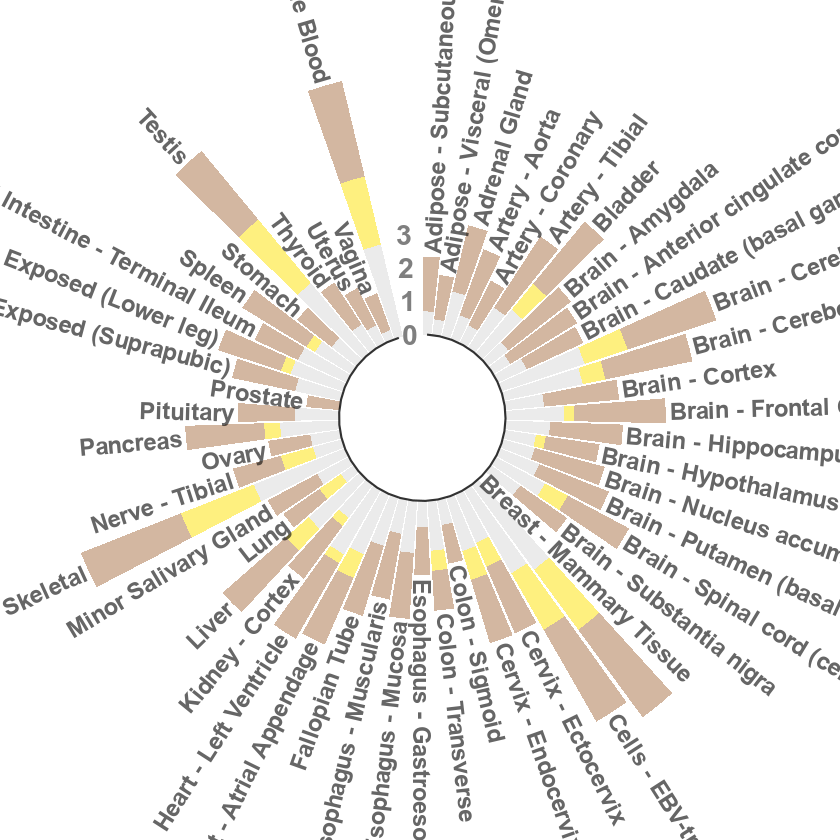

In [3]:
# Loading
library("readxl")
library("tidyverse")
library("ggplot2")
library("dplyr")

# xlsx files
data <- read_excel("/gstock/EXOTIC/data/EXOTIC/circular_barplot.xlsx")


# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 2
nObsType <- length(unique(as.factor(data$Threshold)))
target <- c("bronze", "gold", "silver")

to_add <- data.frame(matrix(NA, empty_bar * length(unique(data$group)) * nObsType, ncol(data)))
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each = empty_bar * nObsType)
data <- rbind(data, to_add)
data <- data %>% arrange(group, Tissue)
data$id <- rep(seq(1, nrow(data)/nObsType), each = nObsType)

data <- data %>% arrange(factor(Threshold, levels = target))
data
# data[match(sort, data$Threshold), ]

# Get the name and the y position of each label
label_data <- data %>% group_by(id, Tissue) %>% summarize(tot = sum(log_value))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id - 0.5)/number_of_bar  # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle + 180, angle)

# prepare a data frame for base lines
base_data <- data %>% group_by(group) %>% summarize(start = min(id), end = max(id) - empty_bar) %>% rowwise() %>% mutate(title = mean(c(start, end)))

# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[c(nrow(grid_data), 1:nrow(grid_data) - 1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1, ]

# Make the plot
p <- ggplot(data) + 
# Add the stacked bar
geom_bar(aes(x = as.factor(id), y = log_value, fill = Threshold, ), stat = "identity", alpha = 0.5) + # viridis::scale_fill_viridis(discrete=TRUE) +
scale_fill_manual("legend", values = c(bronze = "#A77044", silver = "#D7D7D7", gold = "#FEE101")) + scale_y_continuous(trans = "log10") + # Add text showing the value of each 100/75/50/25 lines
annotate("text", x = rep(max(data$id), 4), y = c(0, 1, 2, 3), label = c("0", "1", "2", "3"), color = "black", alpha = 0.5, size = 6, angle = 0, fontface = "bold", 
  hjust = 1) + 
ylim(-2.5, max(label_data$tot, na.rm = T)) + theme_minimal() + theme(legend.position = "none", axis.text = element_blank(), axis.title = element_blank(), 
  panel.grid = element_blank(), plot.margin = unit(rep(-1, 4), "cm"), text = element_text(size = 20), ) + 
coord_polar() + 
# Add labels on top of each bar
geom_text(data = label_data, aes(x = id, y = tot + 0.1, label = Tissue, hjust = hjust), color = "black", fontface = "bold", alpha = 0.6, size = 5, angle = label_data$angle, 
  inherit.aes = FALSE) + 
# Add base line information
geom_segment(data = base_data, aes(x = start, y = 0, xend = end, yend = 0), colour = "black", alpha = 0.8, size = 0.6, inherit.aes = FALSE)
# geom_text(data=base_data, aes(x = title, y = 0, label=group), hjust=c(1,1,0,0), colour = 'black', alpha=0.8, size=8, fontface='bold', inherit.aes =
# FALSE)
p

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

Warning message:
“Ignoring unknown aesthetics: show.legeng”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 6 rows containing missing values (position_stack).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”


id,Tissue,tot,hjust,angle
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,Adipose - Subcutaneous,100,0,86.727273
2,Adipose - Visceral (Omentum),100,0,80.181818
3,Adrenal Gland,100,0,73.636364
4,Artery - Aorta,100,0,67.090909
5,Artery - Coronary,100,0,60.545455
6,Artery - Tibial,100,0,54.000000
7,Bladder,100,0,47.454545
8,Brain - Amygdala,100,0,40.909091
9,Brain - Anterior cingulate cortex (BA24),100,0,34.363636


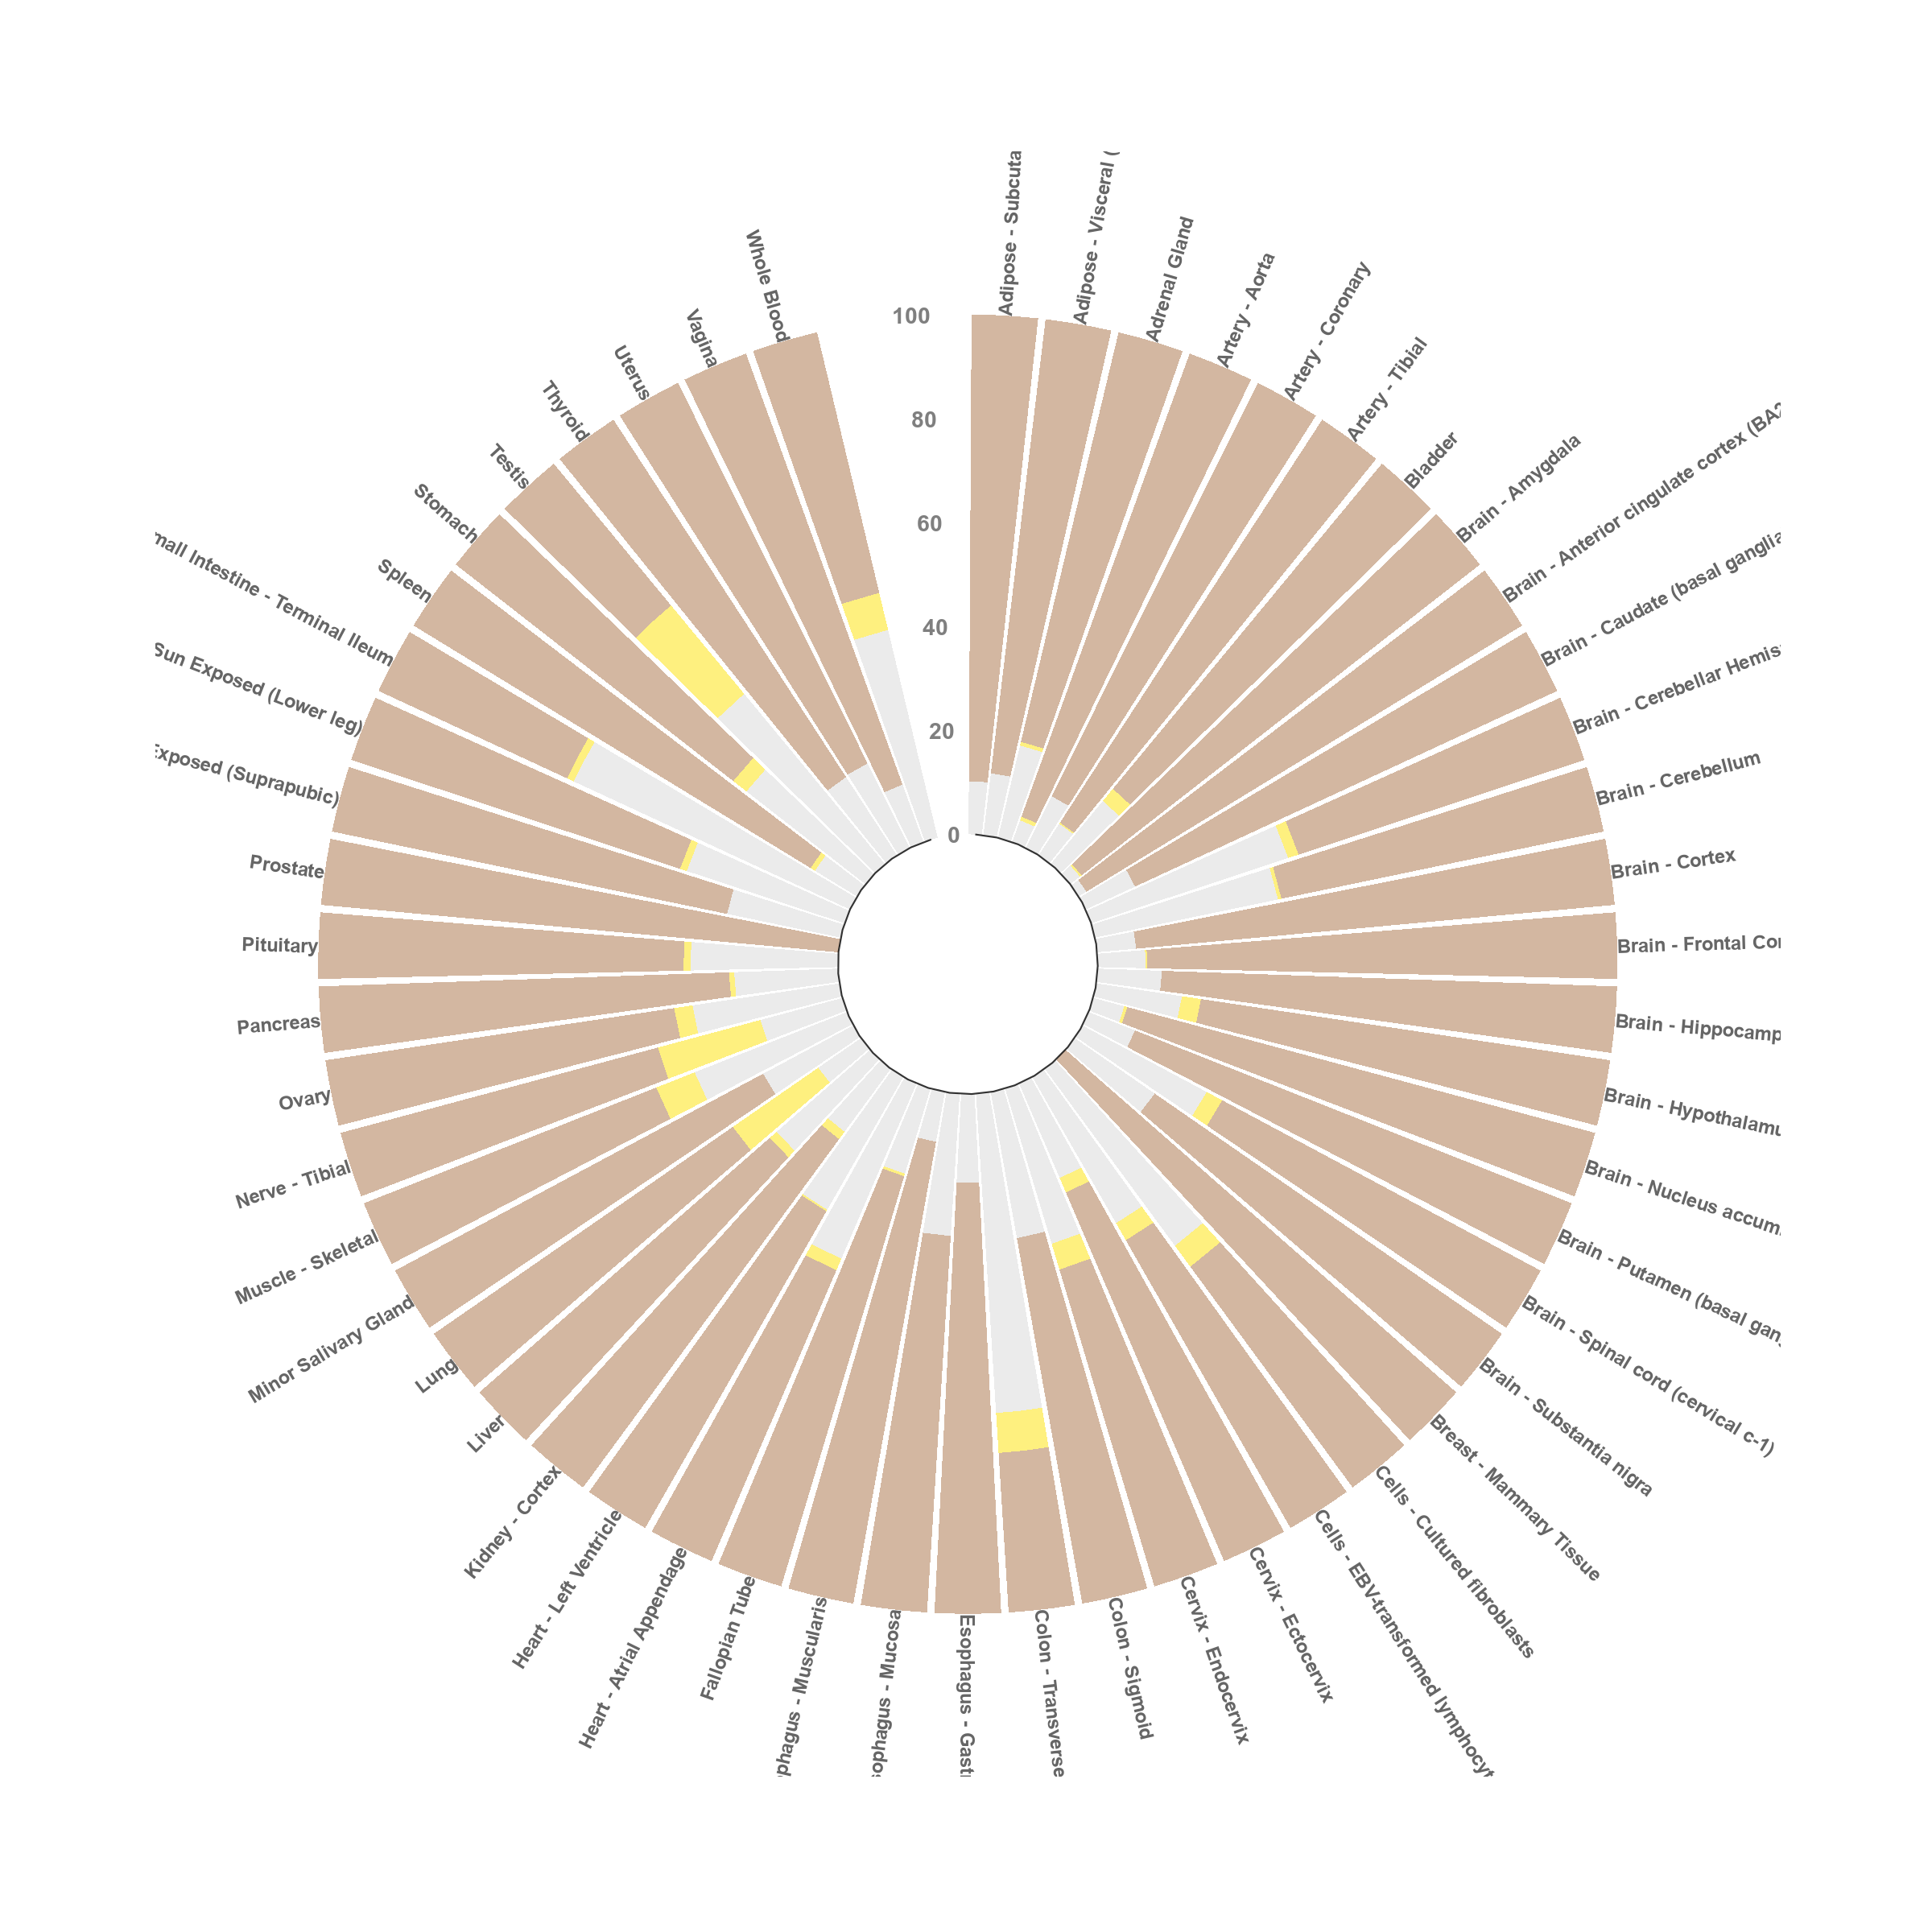

In [160]:
# Loading
library("readxl")
library("tidyverse")
library("ggplot2")
library("dplyr")

# xlsx files
data <- read_excel("/gstock/EXOTIC/data/EXOTIC/circular_barplot_ratio.xlsx")


# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 2
nObsType <- length(unique(as.factor(data$Threshold)))
target <- c("bronze", "silver", "gold")

to_add <- data.frame(matrix(NA, empty_bar * length(unique(data$group)) * nObsType, ncol(data)))
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each = empty_bar * nObsType)
data <- rbind(data, to_add)
data <- data %>% arrange(group, Tissue)
data$id <- rep(seq(1, nrow(data)/nObsType), each = nObsType)

data <- data %>% arrange(factor(Threshold, levels = target))
# data data[match(sort, data$Threshold), ]

# Get the name and the y position of each label
label_data <- data %>% group_by(id, Tissue) %>% summarize(tot = sum(value))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id - 0.5)/number_of_bar  # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle + 180, angle)

# prepare a data frame for base lines
base_data <- data %>% group_by(group) %>% summarize(start = min(id), end = max(id) - empty_bar) %>% rowwise() %>% mutate(title = mean(c(start, end)))

# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[c(nrow(grid_data), 1:nrow(grid_data) - 1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1, ]

# Make the plot
p <- ggplot(data) + 
# Add the stacked bar
geom_bar(aes(x = as.factor(id), y = value, fill = Threshold, show.legeng = TRUE), stat = "identity", alpha = 0.5) + # viridis::scale_fill_viridis(discrete=TRUE) +
scale_fill_manual("legend", values = c(bronze = "#A77044", silver = "#D7D7D7", gold = "#FEE101")) + scale_y_continuous(trans = "log10") + # Add text showing the value of each 100/75/50/25 lines
annotate("text", x = rep(max(data$id), 6), y = c(0, 20, 40, 60, 80, 100), label = c("0", "20", "40", "60", "80", "100"), color = "black", alpha = 0.5, 
  size = 6, angle = 0, fontface = "bold", hjust = 1) + 
ylim(-25, max(label_data$tot, na.rm = T)) + theme_minimal() + theme(legend.position = "none", axis.text = element_blank(), axis.title = element_blank(), 
  panel.grid = element_blank(), plot.margin = unit(rep(4, 20), "cm"), text = element_text(size = 20), ) + 
coord_polar() + 
# Add labels on top of each bar
geom_text(data = label_data, aes(x = id, y = tot, label = Tissue, hjust = hjust), color = "black", fontface = "bold", alpha = 0.6, size = 5, angle = label_data$angle, 
  inherit.aes = FALSE) + 
# Add base line information
geom_segment(data = base_data, aes(x = start, y = 0, xend = end, yend = 0), colour = "black", alpha = 0.8, size = 0.6, inherit.aes = FALSE)
# geom_text(data=base_data, aes(x = title, y = 0, label=group), hjust=c(1,1,0,0), colour = 'black', alpha=0.8, size=8, fontface='bold', inherit.aes =
# FALSE)
p
label_data

,sample,tumor,allele,values
,<fct>,<chr>,<chr>,<dbl>
3,sample3,bladder,exon3,-1.916114377
8,sample8,bladder,exon8,-0.923811697
13,sample13,bladder,exon3,0.058851173
18,sample18,bladder,exon8,-0.586040349
23,sample23,bladder,exon3,-0.247093289
28,sample28,bladder,exon8,0.494166963
33,sample33,bladder,exon3,0.237359038
38,sample38,bladder,exon8,-0.678708268
43,sample43,bladder,exon3,1.117193898


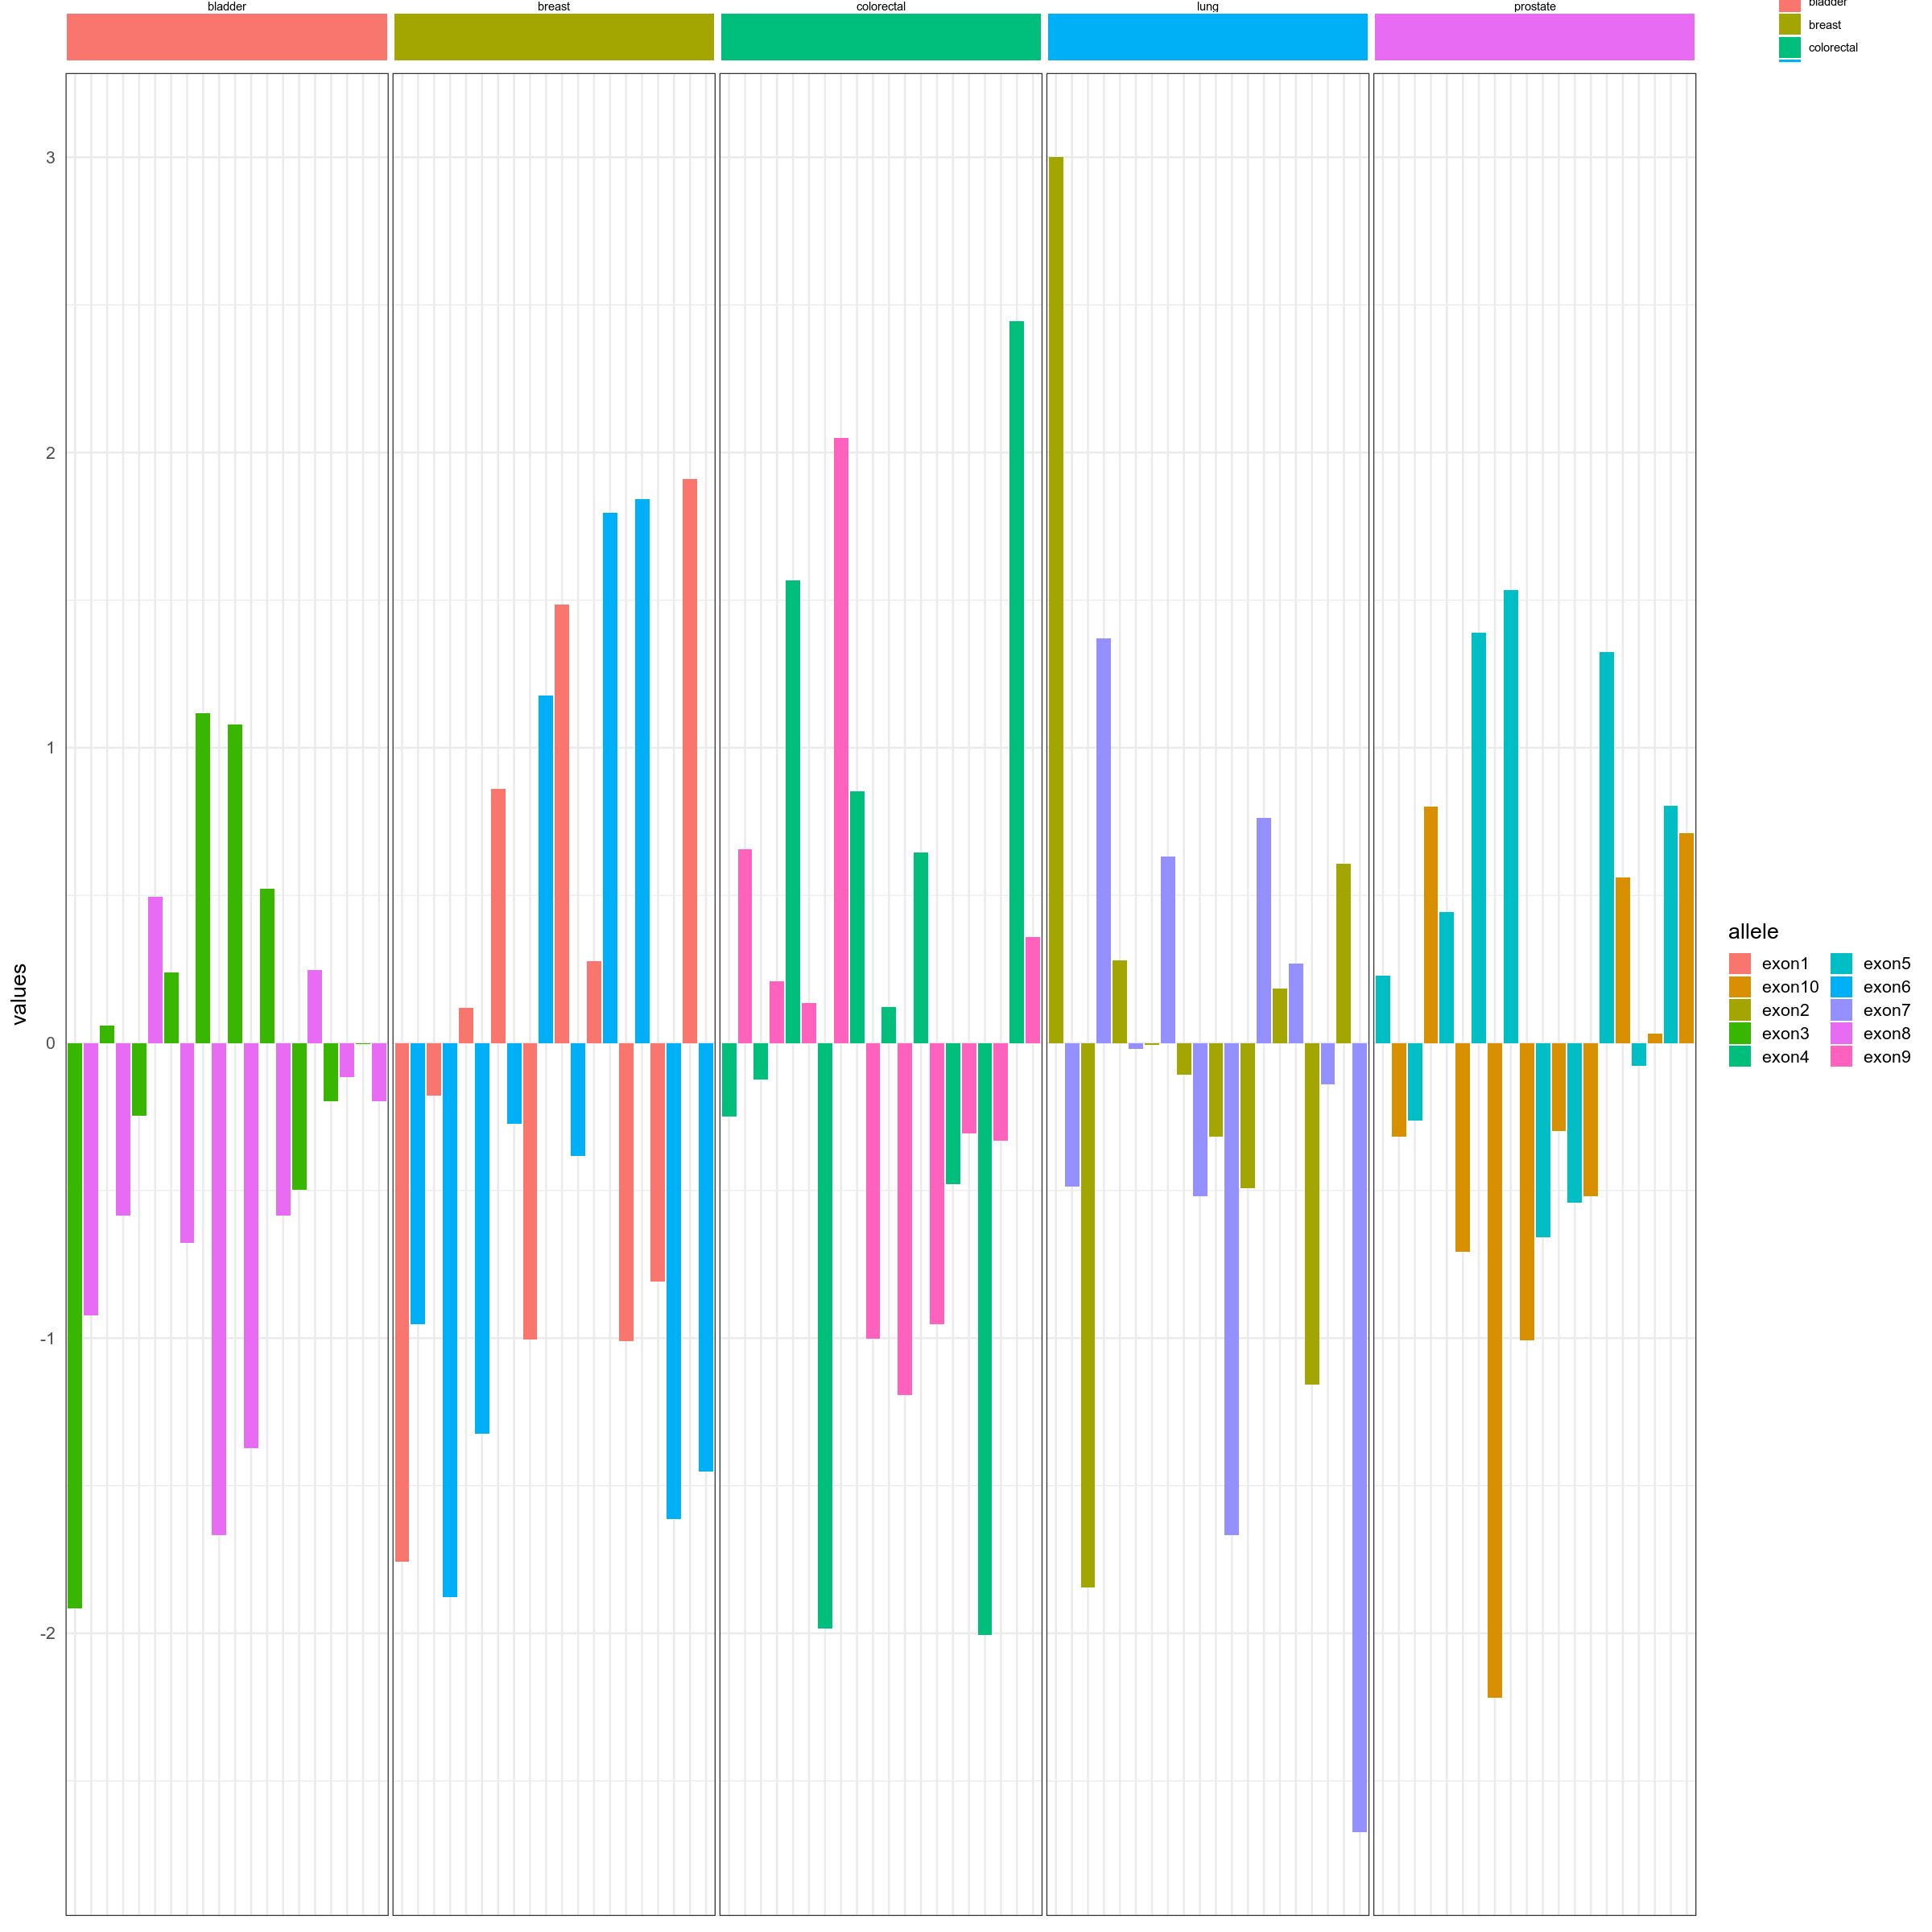

In [458]:
library(ggplot2)
library(cowplot)
test <- data.frame(sample = paste0("sample", 1:100), tumor = rep(c("breast", "lung", "bladder", "colorectal", "prostate"), 20), allele = rep(c("exon1", 
  "exon2", "exon3", "exon4", "exon5", "exon6", "exon7", "exon8", "exon9", "exon10"), 10), values = rnorm(100))
test <- test[order(test$tumor), ]
test$sample <- factor(test$sample, levels = test$sample)
h1 <- ggplot(test) + geom_bar(mapping = aes(x = sample, y = values, fill = allele), stat = "identity", position = "dodge") + guides(fill = guide_legend(ncol = 2)) + 
  theme(axis.text.x.bottom = element_blank(), axis.ticks = element_blank(), panel.spacing.x = unit(1, "mm"), axis.title.x = element_blank(), strip.background.x = element_blank(), 
    strip.text.x = element_blank()) + facet_grid(. ~ tumor, scales = "free_x")
h2 <- ggplot(test) + geom_bar(mapping = aes(x = sample, y = 1, fill = tumor), stat = "identity", width = 1) + theme_void() + theme(panel.spacing.x = unit(1, 
  "mm")) + facet_grid(. ~ tumor, scales = "free_x")

# legend <- plot_grid(get_legend(h2), get_legend(h1), ncol = 1) h1 <- h1 + theme(legend.position = 'none') h2 <- h2 + theme(legend.position = 'none')
plot <- plot_grid(h2, h1, align = "v", ncol = 1, axis = "tb", rel_heights = c(0.5, 15))
plot
test
# plot_grid(plot, legend, nrow = 1, rel_widths = c(10, 1.5))

Warning message:
“Ignoring unknown parameters: height”
Warning message:
“Ignoring unknown parameters: height”
Picking joint bandwidth of 0.00715



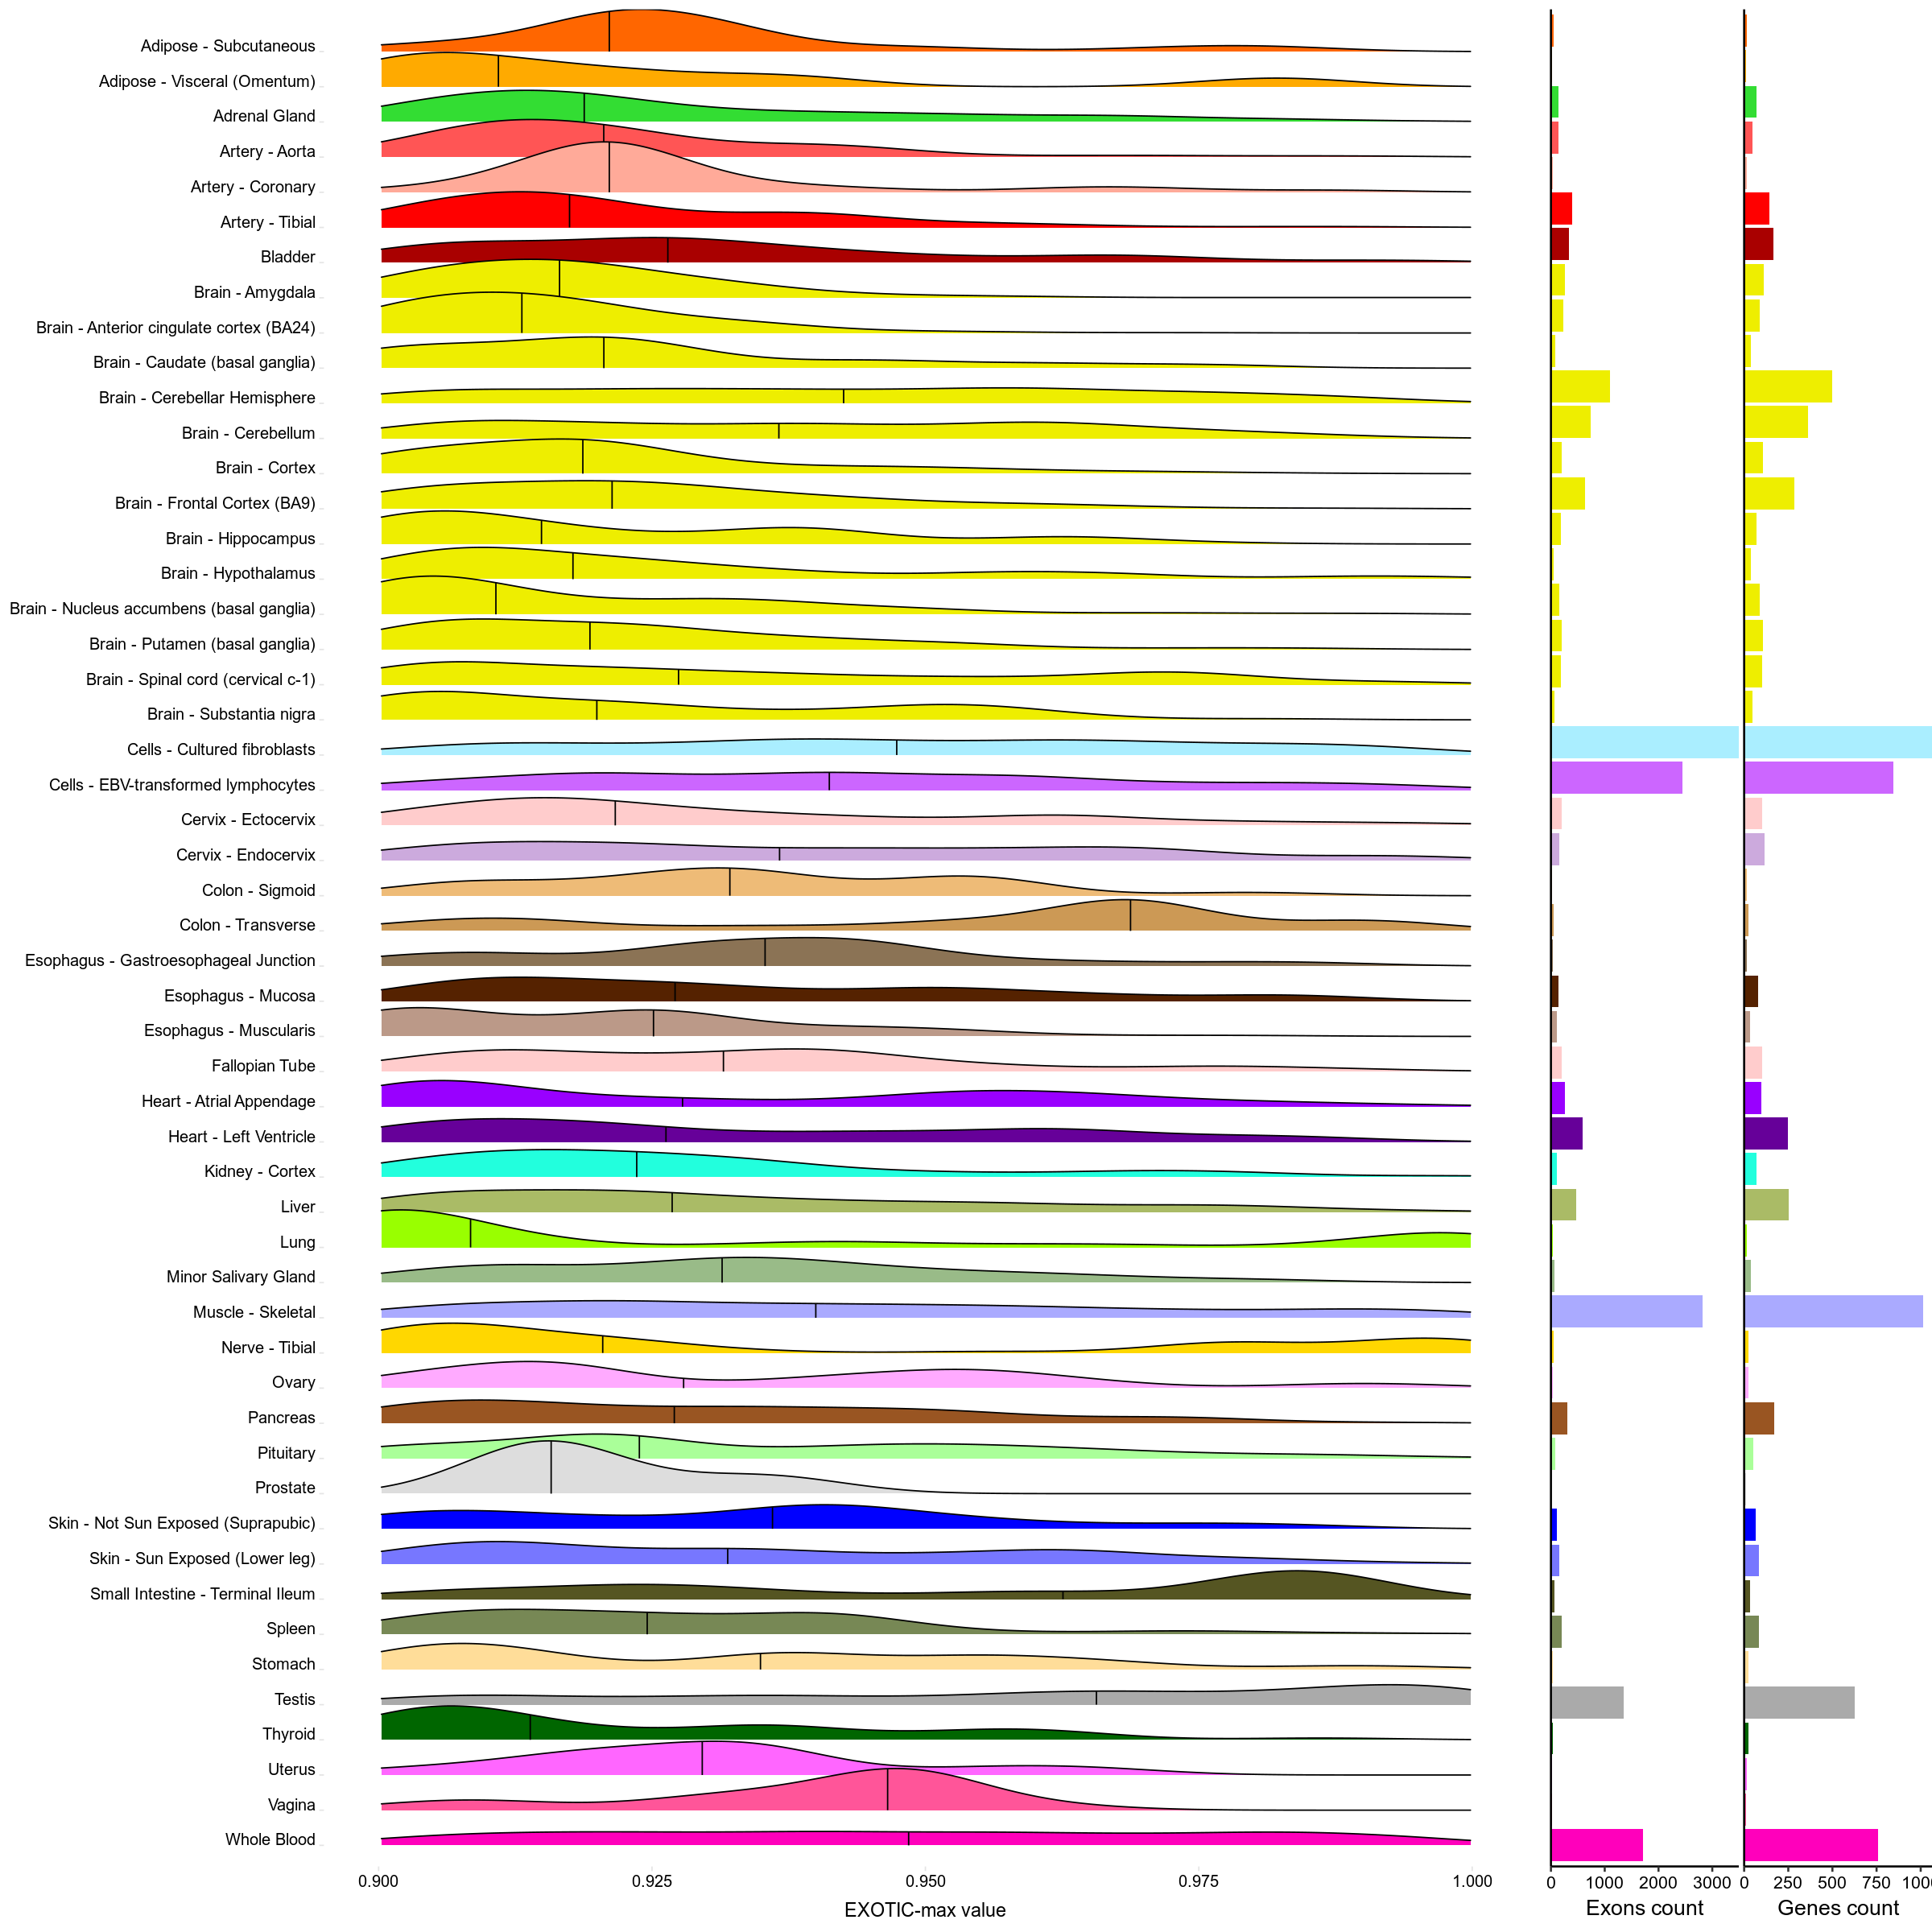

In [606]:

library("readxl")

# xlsx files
df <- read_excel("/gstock/EXOTIC/data/EXOTIC/exotic_ridgeplot_data.xlsx")
df = df %>% arrange(Tissue)


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% df$Tissue ,]



library(tidyverse)
library(ggridges)
library(lubridate)
theme_set(theme_bw(base_size=16))
library(dplyr)

count <- count(df, "Tissue")
count$norm = (count$freq - min(count$freq)) / (max(count$freq) - min(count$freq))

require(plyr)
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count$genes <- count_genes$count

fun_color_range <- colorRampPalette(c("#1b98e0", "red"))
my_colors <- fun_color_range(100) 

# df <- grosses %>% 
#   mutate(Year=factor(year(week_ending))) %>%
#   filter(Year %in% seq(1985,2020, by=5))
h1 <- ggplot(df, aes(y=Tissue,x=value,fill=Tissue), stat="identity") + scale_fill_manual(values=colors$Color) +  scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) +
  geom_density_ridges(scale = 1.5, quantile_lines = TRUE, quantiles = c(0.5), vline_size = 0.5, vline_color = "black")+
  xlim(0.9,1) +

#   theme(legend.position = "none")
  theme_minimal() +

  theme_ridges() + 
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
    axis.title.y = element_blank(),
    panel.grid = element_blank(),
   panel.spacing = unit(0, "lines"),
#     plot.margin = unit(rep(4,20), "cm"),
#     text = element_text(size=12),
      axis.title.x = element_text(hjust = 0.5),
  ) + xlab("EXOTIC-max value")


h2 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=freq, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Exons count")


h3 <- ggplot(count)+
      geom_bar(mapping = aes(y=Tissue, x=genes, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(legend.position = "none", axis.ticks.y = element_blank(), axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) + 
    scale_x_continuous(expand = c(0,0)) + xlab("Genes count")
#      facet_grid(.~Tissue, scales = "free_x")
plot <- plot_grid(h1, h2, h3, align='h', ncol=3, rel_widths = c(8/10, 1/10, 1/10))
plot
# h2

[1] 32

[1] 32

Picking joint bandwidth of 0.00783



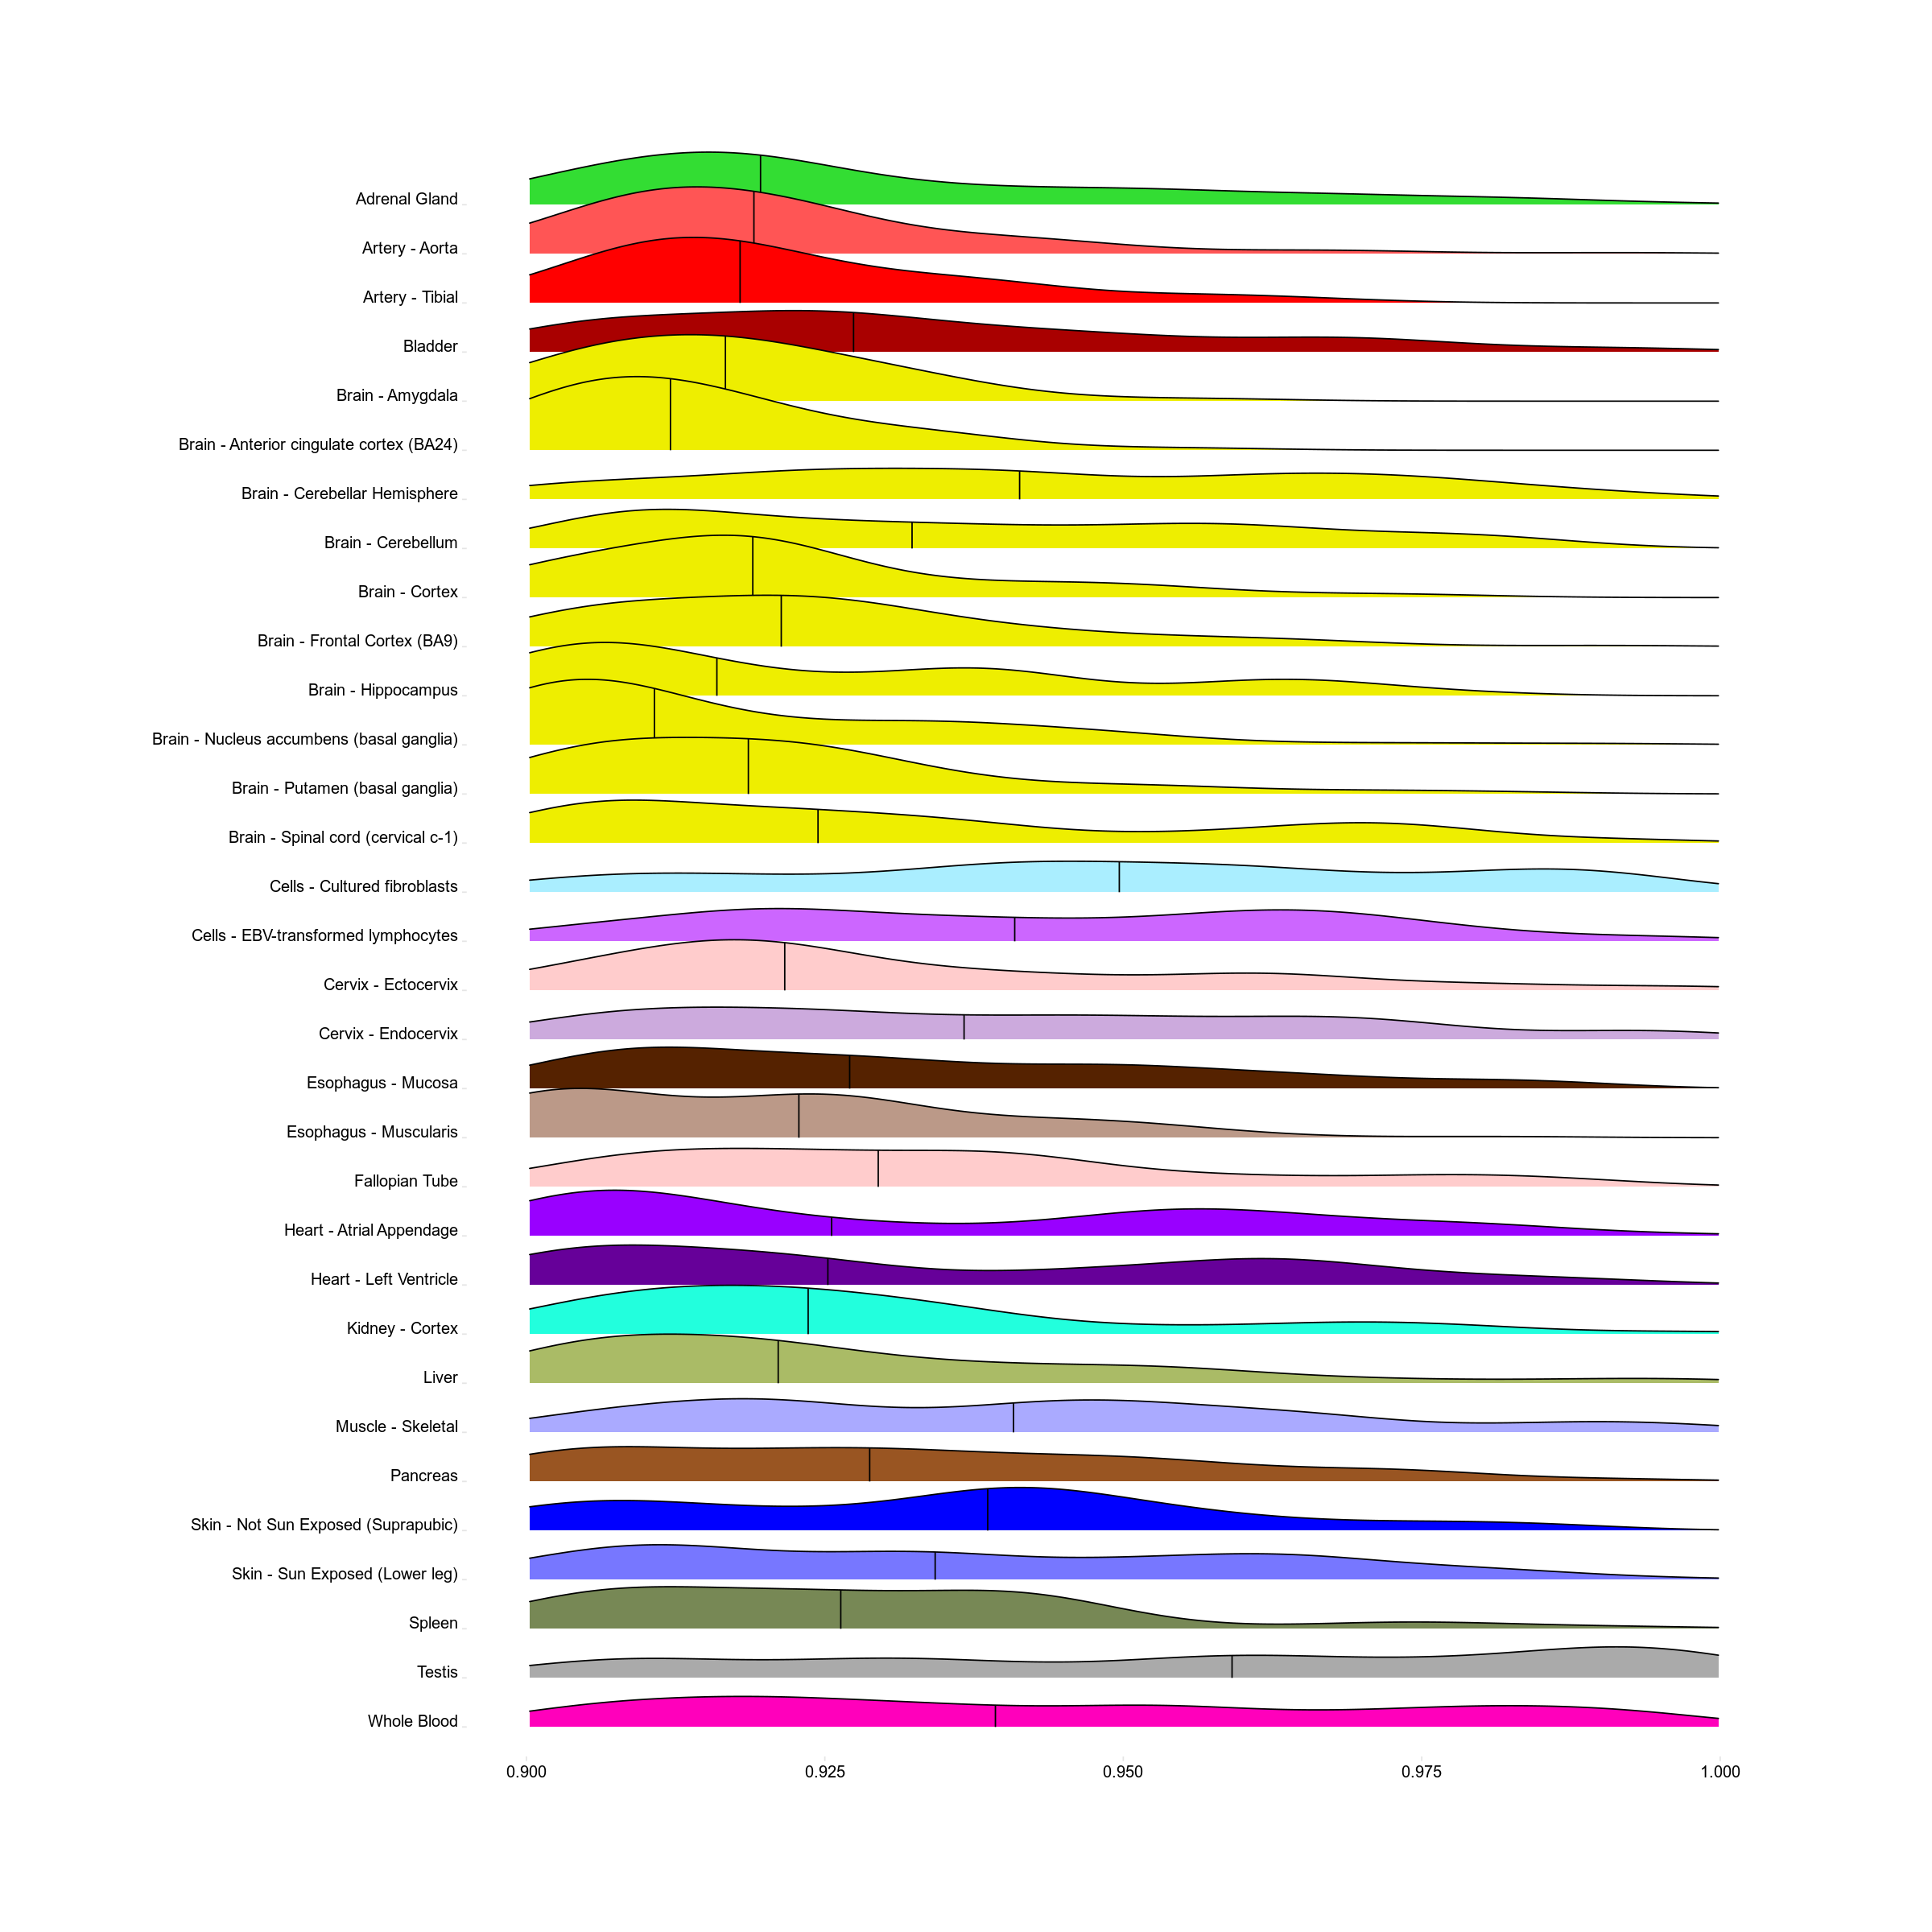

In [437]:

library("readxl")

# xlsx files
df <- read_excel("/gstock/EXOTIC/data/EXOTIC/exotic_ridgeplot_data.xlsx")
df = df %>% arrange(Tissue)


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% df$Tissue ,]
length(unique(df$Tissue))

length(unique(colors$Tissue))


library(tidyverse)
library(ggridges)
library(lubridate)
theme_set(theme_bw(base_size=16))



# df <- grosses %>% 
#   mutate(Year=factor(year(week_ending))) %>%
#   filter(Year %in% seq(1985,2020, by=5))
df %>% 
  ggplot(aes(y=Tissue,x=value,fill=Tissue), stat="identity") + scale_fill_manual(values=colors$Color) +  scale_y_discrete(limits = rev(unique(sort(df$Tissue)))) +
  geom_density_ridges(scale = 1.5, quantile_lines = TRUE, quantiles = c(0.5), vline_size = 0.5, vline_color = "black")+
  xlim(0.9,1) +

#   theme(legend.position = "none")
  theme_minimal() +

  theme_ridges() + 
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
       panel.spacing = unit(0.2, "lines"),
    plot.margin = unit(rep(4,20), "cm"),
    text = element_text(size=20),
  )


Warning message:
“package ‘NMF’ was built under R version 4.0.3”
Loading required package: pkgmaker

Warning message:
“package ‘pkgmaker’ was built under R version 4.0.3”
Loading required package: registry

Warning message:
“package ‘registry’ was built under R version 4.0.3”
Loading required package: rngtools

Warning message:
“package ‘rngtools’ was built under R version 4.0.3”
Loading required package: cluster

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

NMF - BioConductor layer [NO: missing Biobase] | Shared memory capabilities [NO: bigmemory] | Cores 23/24

  To enable the Bioconductor layer, try: install.extras('
NMF
') [with Bioconductor repository enabled]
  To enable shared memory capabilities, try: install.extras('
NMF
')



ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


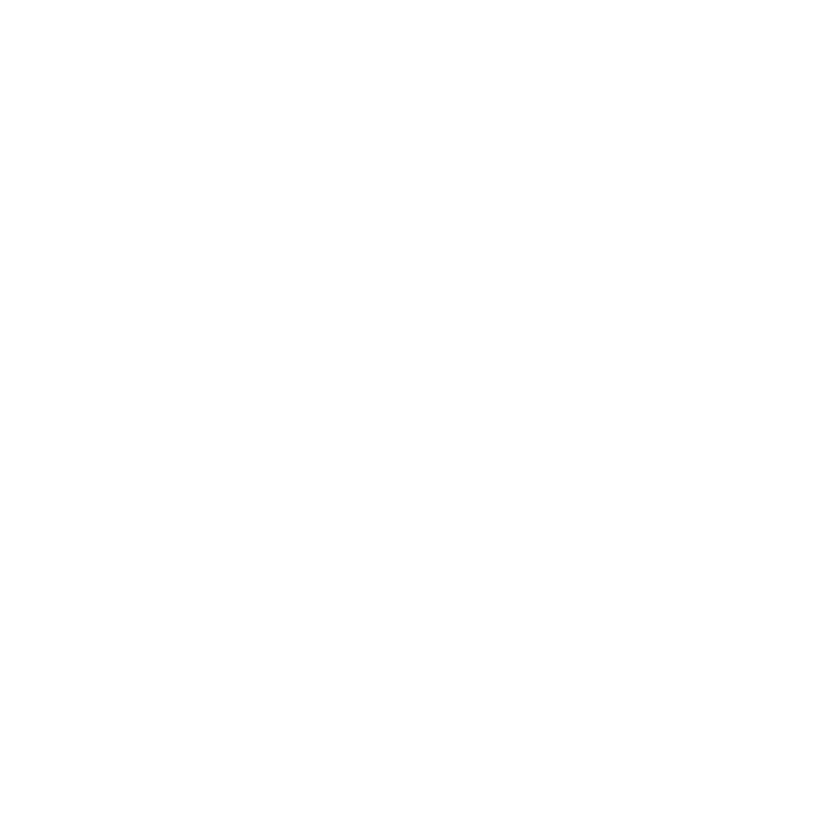

In [3]:
# Generate random data
library(NMF)
n <- 50
p <- 20
x <- abs(rmatrix(n, p, rnorm, mean = 4, sd = 1))
x[1:10, seq(1, 10, 2)] <- x[1:10, seq(1, 10, 2)] + 3
x[11:20, seq(2, 10, 2)] <- x[11:20, seq(2, 10, 2)] + 2
rownames(x) <- paste("ROW", 1:n)
colnames(x) <- paste("COL", 1:p)

# Generate column annotations
annotation <- data.frame(Var1 = factor(1:p%%2 == 0, labels = c("Class1", "Class2")), Var2 = 1:10)
aheatmap(x, annCol = annotation)

In [69]:
library(arrow)

tmp_phylocsf_path <- "/gstock/EXOTIC/data/CONSERVATION/phyloCSF_bool_Rdata.parquet"
# library('feather')
library(data.table)

phylocsf <- read_parquet(tmp_phylocsf_path)
# phylocsf$Length <- phylocsf$End - phylocsf$Start
# phylocsf <- phylocsf[phylocsf$phyloCSF_score <= -100 | phylocsf$phyloCSF_score >= 1000] phylocsf$Conserved_bool <- ifelse(phylocsf$phyloCSF_score
# >=1000, 'TRUE')
phylocsf$phylocsf_bins <- cut(phylocsf$phyloCSF_score, breaks = c(-1e+06, -100, 1000, 1e+06), labels = c("Poorly conserved", "~", "Conserved"))
# head(phylocsf[phylocsf$phylocsf_bins == 'Conserved' & phylocsf$Const_Alt == 'Const', ], 50) phylocsf %>% group_by(phylocsf_bins) %>% sample_n(50)
phylocsf$phylocsf_bins <- factor(phylocsf$phylocsf_bins, ordered = FALSE)
# phylocsf$Const_Alt <- factor(phylocsf$Const_Alt, ordered = FALSE)
new_df_phylocsf <- phylocsf[phylocsf$phylocsf_bins == "Conserved" | phylocsf$phylocsf_bins == "Poorly conserved" , ]
new_df_phylocsf

# phylocsf$UnConserved_bool <- ifelse(phylocsf$phyloCSF_score <=-100, 'TRUE', 'FALSE') phylocsf$Length = double(phylocsf$Length) phylocsf1 =
# head(phylocsf[phylocsf$Const_Alt == 'Const'], 10) phylocsf2 = head(phylocsf[phylocsf$Const_Alt == 'Alt'], 10) phylocsf <- rbind(phylocsf1, phylocsf2)
# phylocsf$Const_Alt <- as.factor(phylocsf$Const_Alt) phylocsf$Length <- as.factor(phylocsf$Length) dim(new_df_phylocsf)
# new_df_phylocsf

Gene,ranges,phyloCSF_score,Ratio_num,Standard,Unconserved,Conserved,Constitutive,Alternative,Const_Alt,Cat80100,Cat6080,Cat4060,Cat2040,Cat0020,phylocsf_bins
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>
A2M,9247569-9247680,-262.0118,1.0000000,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Poorly conserved
A2ML1,9002265-9002355,-128.3333,1.0000000,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Poorly conserved
AAR2,34827791-34828547,2694.8294,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
AATK,79094001-79096623,5871.9743,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139902868-139903074,1083.4374,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139907164-139907377,1188.0156,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139907454-139907770,1719.5819,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139910127-139910323,1109.4903,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139911372-139911576,1148.3248,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved


In [2]:
treatments <- c("Placebo", "Low Dose", "High Dose")
ae_present <- c("No", "Yes")

dat <- matrix(c(85, 1, 80, 5, 77, 8), nrow = 3, ncol = 2, byrow = TRUE)
dimnames(dat) <- list("Treatments" = treatments, "AE Present" = ae_present)
library(epitools)
or_fit <- oddsratio(dat)
or_fit

Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”


,No,Yes,Total
Placebo,85,1,86
Low Dose,80,5,85
High Dose,77,8,85
Total,242,14,256
,estimate,lower,upper
Placebo,1.000000,NA,NA
Low Dose,4.755327,0.7107625,127.7539
High Dose,7.804760,1.3552471,199.6285
,midp.exact,fisher.exact,chi.square
Placebo,NA,NA,NA


In [21]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Const_Alt"  # Bowel perforation

In [16]:
library(finalfit)
t1 <- phylocsf %>% summary_factorlist(dependent, explanatory, p = TRUE, add_dependent_label = TRUE)
knitr::kable(t1, row.names = FALSE, align = c("l", "l", "r", "r", "r"))



|Dependent: Const_Alt |      |          Alt|        Const|      p|
|:--------------------|:-----|------------:|------------:|------:|
|Unconserved          |FALSE | 28990 (95.8)| 58034 (98.2)| <0.001|
|                     |TRUE  |   1284 (4.2)|   1082 (1.8)|       |
|Standard             |FALSE |  3093 (10.2)|   4787 (8.1)| <0.001|
|                     |TRUE  | 27181 (89.8)| 54329 (91.9)|       |
|Conserved            |FALSE | 28465 (94.0)| 55411 (93.7)|  0.089|
|                     |TRUE  |   1809 (6.0)|   3705 (6.3)|       |

In [33]:
phylocsf$Const_Alt <- as.factor(phylocsf$Const_Alt)
phylocsf$Length <- as.factor(phylocsf$Length)

In [17]:
library(dplyr)
phylocsf <- phylocsf %>% mutate_if(is.character, as.factor)
head(phylocsf)

Gene,ranges,phyloCSF_score,Ratio_num,Unconserved,Standard,Conserved,Constitutive,Alternative,Const_Alt,80_100,60_80,40_60,20_40,00_20
<fct>,<fct>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
A2M,9220779-9220820,32.3101,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,9221336-9221438,249.4621,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,9222341-9222409,154.1365,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,9223084-9223174,276.7767,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,9224955-9225082,64.5843,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,9225249-9225467,465.8814,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE


In [41]:
tmp_phylocsf <- phylocsf[phylocsf$Conserved == TRUE | phylocsf$Unconserved == TRUE, ]
dim(tmp_phylocsf)
head(tmp_phylocsf)

[1] 7880   15

Gene,ranges,phyloCSF_score,Ratio_num,Unconserved,Standard,Conserved,Constitutive,Alternative,Const_Alt,Cat80100,Cat6080,Cat4060,Cat2040,Cat0020
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
A2M,9247569-9247680,-262.0118,1,TRUE,FALSE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
A2ML1,9002265-9002355,-128.3333,1,TRUE,FALSE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
AAR2,34827791-34828547,2694.8294,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
AATK,79094001-79096623,5871.9743,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139902868-139903074,1083.4374,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139907164-139907377,1188.0156,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE


In [37]:
head(tmp_phylocsf)

Gene,ranges,phyloCSF_score,Ratio_num,Unconserved,Standard,Conserved,Constitutive,Alternative,Const_Alt,80_100,60_80,40_60,20_40,00_20
<fct>,<fct>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
A2M,9247569-9247680,-262.0118,1,TRUE,FALSE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
A2ML1,9002265-9002355,-128.3333,1,TRUE,FALSE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
AAR2,34827791-34828547,2694.8294,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
AATK,79094001-79096623,5871.9743,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139902868-139903074,1083.4374,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139907164-139907377,1188.0156,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE


In [39]:
tmp_phylocsf %>% 
  rename(
    80\_100 = cat5,
    )
tmp_phylocsf

ERROR: Error in parse(text = x, srcfile = src): <text>:3:7: unexpected input
2:   rename(
3:     80\
         ^


In [71]:
head(new_df_phylocsf)

Gene,ranges,phyloCSF_score,Ratio_num,Standard,Unconserved,Conserved,Constitutive,Alternative,Const_Alt,Cat80100,Cat6080,Cat4060,Cat2040,Cat0020,phylocsf_bins
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>
A2M,9247569-9247680,-262.0118,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Poorly conserved
A2ML1,9002265-9002355,-128.3333,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Poorly conserved
AAR2,34827791-34828547,2694.8294,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
AATK,79094001-79096623,5871.9743,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139902868-139903074,1083.4374,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139907164-139907377,1188.0156,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved


In [70]:
explanatory <- c('phylocsf_bins')
dependent <- "Constitutive"  # Bowel perforation
t3 <-  new_df_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...





|explanatory            |OR                        |
|:----------------------|:-------------------------|
|phylocsf_binsConserved |2.43 (2.20-2.68, p<0.001) |

In [87]:
library(reticulate)
os <- import("os")
os$listdir(".")

[1] ".ipynb_checkpoints" "Untitled2.ipynb"    "output.png"        
[4] "Untitled1.ipynb"    "Untitled.ipynb"     "rplot.png"         
[7] "test.R"

In [124]:
library(stringr)
explanatory <- c('phylocsf_bins')
dependent <- "Cat80100"  # Bowel perforation
t3 <-  new_df_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
t3$OR
typeof(t3$OR)
gsub("[()p=]", "", unlist(strsplit(t3$OR, " ")))



Waiting for profiling to be done...



[1] "1.16 (0.87-1.58, p=0.323)"

[1] "character"

[1] "1.16"       "0.87-1.58," "0.323"

In [ ]:
library(ggplo2)
ggplot(df, aes(Group,m,fill=Group)) + 
  geom_bar(stat="identity", color="black", 
           position=position_dodge()) +
  geom_errorbar(aes(ymin=m-stdv, ymax=m+stdv), width=.2,
                position=position_dodge(.9))

In [75]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Constitutive"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...



explanatory,OR
<chr>,<chr>
UnconservedTRUE,"0.41 (0.37-0.45, p<0.001)"
ConservedTRUE,"2.43 (2.20-2.68, p<0.001)"


In [66]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Alternative"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |2.43 (2.20-2.68, p<0.001) |
|ConservedTRUE   |0.41 (0.37-0.45, p<0.001) |

In [59]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat0020"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |3.58 (2.61-4.94, p<0.001) |
|ConservedTRUE   |0.28 (0.20-0.38, p<0.001) |

In [60]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat2040"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |2.99 (2.55-3.50, p<0.001) |
|ConservedTRUE   |0.33 (0.29-0.39, p<0.001) |

In [61]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat4060"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |1.67 (1.47-1.89, p<0.001) |
|ConservedTRUE   |0.60 (0.53-0.68, p<0.001) |

In [62]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat6080"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |1.24 (1.06-1.45, p=0.008) |
|ConservedTRUE   |0.81 (0.69-0.95, p=0.008) |

In [63]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat80100"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |0.86 (0.63-1.15, p=0.323) |
|ConservedTRUE   |1.16 (0.87-1.58, p=0.323) |

In [29]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Const_Alt"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |0.41 (0.37-0.45, p<0.001) |
|ConservedTRUE   |2.43 (2.20-2.68, p<0.001) |

In [22]:
t3 <- phylocsf %>% finalfit(dependent, explanatory)
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...





|Dependent: Const_Alt |      |          Alt|        Const|          OR (univariable)|        OR (multivariable)|
|:--------------------|:-----|------------:|------------:|-------------------------:|-------------------------:|
|Unconserved          |FALSE | 28990 (33.3)| 58034 (66.7)|                         -|                         -|
|                     |TRUE  |  1284 (54.3)|  1082 (45.7)| 0.42 (0.39-0.46, p<0.001)| 0.42 (0.39-0.46, p<0.001)|
|Conserved            |FALSE | 28465 (33.9)| 55411 (66.1)|                         -|                         -|
|                     |TRUE  |  1809 (32.8)|  3705 (67.2)| 1.05 (0.99-1.12, p=0.086)| 1.02 (0.97-1.09, p=0.411)|

In [167]:
res_glm_uni <- new_df_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
res_glm_uni

Waiting for profiling to be done...



explanatory,OR
<chr>,<chr>
phylocsf_bins~,"2.53 (1.12-5.85, p=0.027)"
phylocsf_binsConserved,"5.29 (2.50-11.54, p<0.001)"


In [110]:
library(MASS)
fractions(2.43)
fractions(0.41)

[1] 243/100

[1] 41/100

In [ ]:
phylocsf %>% or_plot(dependent, explanatory, table_text_size = 4, title_text_size = 14, column_space = c(-2, 0, 4))

In [67]:
library(arrow)
library(dplyr)
library(finalfit)

tmp_ccrs_path <- "/gstock/EXOTIC/data/VARIATIONS/CCRS_modified_refseq_corrected.parquet"
merge_df <- read_parquet(tmp_ccrs_path)
merge_df <- merge_df %>% mutate_if(is.character, as.factor)

head(merge_df)

Gene,RefSeq_Chrom,CCRS_ranges,CCRS_Start,CCRS_End,CCRS_CCR_percentile,Missing_coverage_bp,Gap_with_previous_CCRS,ranges,Ratio_num,⋯,CCRS_bins,Start,Stop,Length,CCR_0_20_bool,CCR_20_80_bool,CCR_80_90_bool,CCR_90_95_bool,CCR_95_99_bool,CCR_99_100_bool
<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,⋯,<ord>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
A2M,12,9220421-9220435,9220421,9220435,94.96031,0,NA,9220419-9220435,1,⋯,90 - 95,9220419,9220435,16,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
A2M,12,9220792-9220793,9220792,9220793,0.00000,0,NA,9220779-9220820,1,⋯,0 - 20,9220779,9220820,41,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,12,9220793-9220810,9220793,9220810,72.87047,0,NA,9220779-9220820,1,⋯,20 - 80,9220779,9220820,41,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
A2M,12,9220810-9220811,9220810,9220811,0.00000,0,NA,9220779-9220820,1,⋯,0 - 20,9220779,9220820,41,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,12,9220811-9220820,9220811,9220820,96.31908,0,NA,9220779-9220820,1,⋯,95 - 99,9220779,9220820,41,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
A2M,12,9221372-9221373,9221372,9221373,0.00000,0,NA,9221336-9221438,1,⋯,0 - 20,9221336,9221438,102,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


In [106]:
library(hablar)
new_df <- rbind(head(merge_df[merge_df$CCRS_bins == "99 - 100" & merge_df$Const_Alt == "Const", ], 1000), merge_df %>% group_by(CCRS_bins) %>% sample_n(500))
new_df$CCRS_bins <- factor(new_df$CCRS_bins, ordered = FALSE)
# new_df$CCRS_bins <- as.factor(new_df$CCRS_bins) new_df %>% convert(fct(CCRS_bins))
sapply(new_df, class)
# head(new_df)

$Gene
[1] "factor"

$RefSeq_Chrom
[1] "integer"

$CCRS_ranges
[1] "factor"

$CCRS_Start
[1] "integer"

$CCRS_End
[1] "integer"

$CCRS_CCR_percentile
[1] "numeric"

$Missing_coverage_bp
[1] "numeric"

$Gap_with_previous_CCRS
[1] "factor"

$ranges
[1] "factor"

$Ratio_num
[1] "numeric"

$Const_Alt
[1] "factor"

$Ratio_num_bins
[1] "ordered" "factor" 

$CCRS_bins
[1] "factor"

$Start
[1] "integer"

$Stop
[1] "integer"

$Length
[1] "integer"

$CCR_0_20_bool
[1] "logical"

$CCR_20_80_bool
[1] "logical"

$CCR_80_90_bool
[1] "logical"

$CCR_90_95_bool
[1] "logical"

$CCR_95_99_bool
[1] "logical"

$CCR_99_100_bool
[1] "logical"

In [104]:
head(new_df)

Gene,RefSeq_Chrom,CCRS_ranges,CCRS_Start,CCRS_End,CCRS_CCR_percentile,Missing_coverage_bp,Gap_with_previous_CCRS,ranges,Ratio_num,⋯,CCRS_bins,Start,Stop,Length,CCR_0_20_bool,CCR_20_80_bool,CCR_80_90_bool,CCR_90_95_bool,CCR_95_99_bool,CCR_99_100_bool
<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,⋯,<ord>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ABCA2,9,139905912-139906006,139905912,139906006,99.53572,0,NA,139905859-139906006,1,⋯,99 - 100,139905859,139906006,147,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABCA2,9,139910615-139910626,139910615,139910626,99.37479,0,NA,139910414-139910626,1,⋯,99 - 100,139910414,139910626,212,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABL1,9,133730221-133730300,133730221,133730300,99.20990,0,NA,133730188-133730483,1,⋯,99 - 100,133730188,133730483,295,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABL1,9,133750344-133750438,133750344,133750438,99.53764,0,NA,133750255-133750439,1,⋯,99 - 100,133750255,133750439,184,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACLY,17,40030145-40030218,40030145,40030218,99.47297,0,NA,40030064-40030218,1,⋯,99 - 100,40030064,40030218,154,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACTL6A,3,179301150-179301236,179301150,179301236,99.60642,0,NA,179301141-179301236,1,⋯,99 - 100,179301141,179301236,95,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [107]:
head(colon_s)

,id,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,⋯,node4.factor,status.factor,age.factor,loccomp,loccomp.factor,time.years,mort_5yr,age.10,mort_5yr.num,hospital
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
1,1,Lev+5FU,1,43,NA,0,0,5,1,2,⋯,Yes,Died,40-59 years,NA,NA,4.1671233,Died,4.3,2,hospital_5
2,2,Lev+5FU,1,63,0,0,0,1,0,2,⋯,No,Alive,60+ years,0,No,8.4575342,Alive,6.3,1,hospital_3
3,3,Obs,0,71,0,0,1,7,1,2,⋯,Yes,Died,60+ years,1,Yes,2.6383562,Died,7.1,2,hospital_5
4,4,Lev+5FU,0,66,1,0,0,6,1,2,⋯,Yes,Died,60+ years,1,Yes,0.8027397,Died,6.6,2,hospital_4
5,5,Obs,1,69,0,0,0,22,1,2,⋯,Yes,Died,60+ years,0,No,1.8054795,Died,6.9,2,hospital_5
6,6,Lev+5FU,0,57,0,0,0,9,1,2,⋯,Yes,Died,40-59 years,0,No,4.8410959,Died,5.7,2,hospital_4


In [110]:
explanatory <- c("CCRS_bins")
dependent <- "Const_Alt"  # Bowel perforation
# new_df %>% finalfit(dependent, explanatory) -> t3 knitr::kable(t3, row.names=FALSE, align=c('l', 'l', 'r', 'r', 'r', 'r'))

In [42]:

res_glm_uni <- new_df %>% glmuni(dependent, explanatory) %>% fit2df()
res_glm_uni

Waiting for profiling to be done...



explanatory,OR
<chr>,<chr>
Const_AltConst,"1.58 (1.29-1.92, p<0.001)"


In [30]:
res_glm_uni$OR

[1] "0.63 (0.52-0.77, p<0.001)" "0.77 (0.63-0.94, p=0.009)"
[3] "1.07 (0.87-1.33, p=0.503)" "1.11 (0.90-1.37, p=0.324)"
[5] "1.33 (1.07-1.65, p=0.010)" "1.38 (1.11-1.71, p=0.004)"

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Warning message:
“Removed 1 rows containing missing values (geom_errorbarh).”


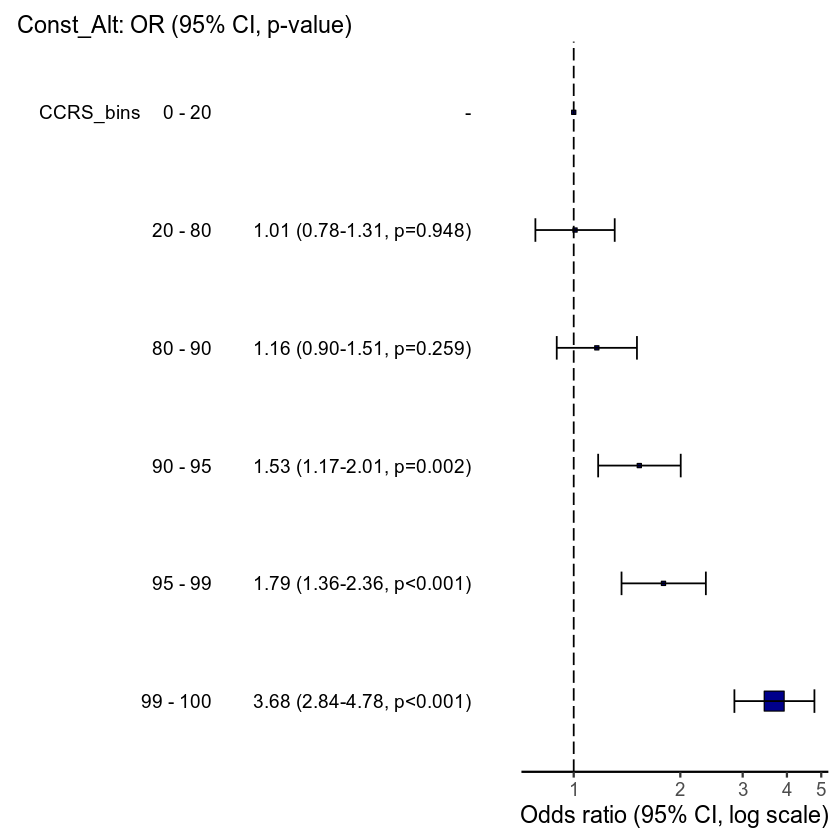

In [117]:
new_df %>% or_plot(dependent, explanatory, table_text_size = 4, title_text_size = 14, column_space = c(-0.5, -0.1, 0.5))

In [4]:
    data("heart_disease")
    HD <- heart_disease
    head(HD)

Warning message in data("heart_disease"):
“data set ‘heart_disease’ not found”


ERROR: Error in eval(expr, envir, enclos): objet 'heart_disease' introuvable
